<div align="center"><img src="https://i.postimg.cc/3wfbZxRw/cabecera.png" alt="2-4-head" border="0"></a></div>

### **IMPORTACIÓN DE LIBRERÍAS**

In [140]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None 
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from scipy.cluster import hierarchy
from sklearn.feature_selection import SelectKBest
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold

### **DEFINICIÓN DE CONSTANTES**

In [141]:
PALETA = ["#c7ec6a", "#d1e1a7", "#f4f4fa", "#dbe0e6", "#6d82cd", "#aebbed"]
MAPAC = sb.diverging_palette(257.6,101.4, s=68.2, l=71.6, center='light',  as_cmap=True)
COLOR1 = "#c7ec6a"
COLOR2 = "#d1e1a7"
COLOR3 = "#f4f4fa"
COLOR4 = "#dbe0e6"
COLOR5 = "#6d82cd"
COLOR6 = "#aebbed"
FIGCON = sb.set(rc={"axes.facecolor":COLOR4,"figure.facecolor":COLOR3})
RUTA = 'df_estados_bank.csv'
BANKDF = pd.read_csv(RUTA, sep=',')
RANDOM = 42

<div align="center"><img src="https://i.postimg.cc/rpb2CGS0/EDA.png" alt="2-4-head" border="0"></a></div>

En esta sección cargaremos y limpiaremos los datos que tenemos:
<ul>
  <li>Crearemos el diccionario de variables para entender los datos con los que trabajamos</li>
  <li>Exploraremos la composición de nuestro dataset utilizando el info, el describe y la búsqueda de valores nulos y duplicados</li>
  <li>Trataremos y transformaremos las variables que lo necesiten con el fin de optimizar el dataset para los modelos predictivos</li>
  <li>Nos apoyaremos de diferentes gráficas para analizar patrones de comportamiento</li>
  <li>Por último procederemos a identificar las variables de mayor importancia para definir el tipo de modelo y métricas de comprobación a utilizar</li></ul>



<div align="center"><img src="https://i.postimg.cc/Hs2GP1wC/subheads-copia.png" alt="2-4-head" border="0"></a></div>

**DICCIONARIO DE VARIABLES**

• **RowNumber**: número de registro.

• **CustomerId**: identificador único de cliente.

• **Surname**: apellido del cliente.

• **CreditScore**: puntuación de crédito del cliente.

• **Geography**: estado del cliente.

• **Gender**: género del cliente.

• **Age**: edad del cliente.

• **Tenure**: número de años que el cliente lleva en el banco.

• **Balance**: balance del cliente.

• **NumOfProducts**: número de productos que el cliente tiene en el banco.

• **HasCrCard**: si el cliente tiene o no tarjeta de crédito.

• **IsActiveMember**: es cliente activo o no de la entidad.

• **EstimatedSalary**: salario que la entidad estima que ingresa mensualmente el cliente.

• **Exited**: *(variable objetivo)*:
- 1 : el cliente abandonó la entidad
- 0 : el cliente no abandonó la entidad

<div align="center"><img src="https://i.postimg.cc/xjmn5Zp0/explor.png" alt="2-4-head" border="0"></a></div>

In [142]:
BANKDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   RowNumber        10000 non-null  int64  
 2   CustomerId       10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Gender           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   Age              9360 non-null   float64
 10  Geography        10000 non-null  object 
 11  EstimatedSalary  9208 non-null   float64
 12  Surname          9706 non-null   object 
 13  Exited           10000 non-null  int64  
 14  Tenure           10000 non-null  int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 1.1+ MB


In [143]:
# Nulos por columnas en formato porcentaje
round((BANKDF.isna().sum()*100)/BANKDF.shape[0])

Unnamed: 0        0.00
RowNumber         0.00
CustomerId        0.00
CreditScore       0.00
Gender            0.00
Balance           0.00
NumOfProducts     0.00
HasCrCard         0.00
IsActiveMember    0.00
Age               6.00
Geography         0.00
EstimatedSalary   8.00
Surname           3.00
Exited            0.00
Tenure            0.00
dtype: float64

In [144]:
BANKDF.describe(include='all')

Unnamed: 0  RowNumber  CustomerId  CreditScore Gender   Balance   
count     10000.00   10000.00    10000.00     10000.00  10000  10000.00  \
unique         NaN        NaN         NaN          NaN      2       NaN   
top            NaN        NaN         NaN          NaN   Male       NaN   
freq           NaN        NaN         NaN          NaN   5457       NaN   
mean       4999.50    5000.50 15690940.57       650.53    NaN  76485.89   
std        2886.90    2886.90    71936.19        96.65    NaN  62397.41   
min           0.00       1.00 15565701.00       350.00    NaN      0.00   
25%        2499.75    2500.75 15628528.25       584.00    NaN      0.00   
50%        4999.50    5000.50 15690738.00       652.00    NaN  97198.54   
75%        7499.25    7500.25 15753233.75       718.00    NaN 127644.24   
max        9999.00   10000.00 15815690.00       850.00    NaN 250898.09   

        NumOfProducts  HasCrCard  IsActiveMember     Age Geography   
count        10000.00   10000.00        10000.00 9360.00     10000  \
unique            NaN        NaN             NaN     NaN         3   
top               NaN        NaN             NaN     NaN     Texas   
freq              NaN        NaN             NaN     NaN      5014   
mean             1.53       0.71            0.52   38.87       NaN   
std              0.58       0.46            0.50   10.48       NaN   
min              1.00       0.00            0.00   18.00       NaN   
25%              1.00       0.00            0.00   32.00       NaN   
50%              1.00       1.00            1.00   37.00       NaN   
75%              2.00       1.00            1.00   44.00       NaN   
max              4.00       1.00            1.00   92.00       NaN   

        EstimatedSalary Surname   Exited   Tenure  
count           9208.00    9706 10000.00 10000.00  
unique              NaN    2885      NaN      NaN  
top                 NaN   Smith      NaN      NaN  
freq                NaN      32      NaN      NaN  
mean          100294.79     NaN     0.17     7.22  
std            57573.23     NaN     0.38    14.97  
min               11.58     NaN     0.00     0.00  
25%            51136.84     NaN     0.00     3.00  
50%           100608.43     NaN     0.00     5.00  
75%           149584.73     NaN     0.00     7.00  
max           199992.48     NaN     1.00   100.00

Una vez hemos echado el primer vistazo a los datos que tenemos, procedemos a eliminar las columnas que no nos van a aportar mucho, como lo son los índices, los ID's y el Surname de los clientes. Luego procederemos a tratar los Nulos, en este orden por no perder tiempo tratando nulos de una columna que luego eliminaremos

In [145]:
BANKDF.drop(columns=['Unnamed: 0', 'RowNumber','CustomerId','Surname'], inplace=True)

Siguientes pasos:
<ul>
<li>Trataremos los nulos de la columna Age con la media de edad según el género</li>
<li>Para los nulos de la columna Estimated Salary hemos buscado algún patrón con value_counts entre el salario, el balance y la edad pero sin resultados satisfactorios. Al ser un porcentaje tan pequeño optaremos por rellenarlos con la media también</li></ul>

In [146]:
male=round(BANKDF.loc[np.where(BANKDF['Gender']=='Male'),'Age'].mean())
female=round(BANKDF.loc[np.where(BANKDF['Gender']=='Female'),'Age'].mean())

BANKDF.loc[(BANKDF['Age'].isna()) & (BANKDF['Gender'] == 'Male'), 'Age'] = male
BANKDF.loc[(BANKDF['Age'].isna()) & (BANKDF['Gender'] == 'Female'), 'Age'] = female

In [147]:
BANKDF["EstimatedSalary"].fillna(BANKDF["EstimatedSalary"].mean(),inplace=True)

Comprobamos que no tenemos ningún duplicado

In [148]:
BANKDF.duplicated().sum()

0

Para comprobar si nuestras columnas numericas son en realidad catégoricas o no vamos a realizar un *conteo de valores únicos*:

In [149]:
# Total de valores únicos por columna
for col in BANKDF.columns:
    print(f'Valores únicos de {BANKDF[col].name}: {BANKDF[col].nunique()}')

Valores únicos de CreditScore: 460
Valores únicos de Gender: 2
Valores únicos de Balance: 6382
Valores únicos de NumOfProducts: 4
Valores únicos de HasCrCard: 2
Valores únicos de IsActiveMember: 2
Valores únicos de Age: 70
Valores únicos de Geography: 3
Valores únicos de EstimatedSalary: 9208
Valores únicos de Exited: 2
Valores únicos de Tenure: 12


Comprobamos que las variables: **Gender, NumOfProducts, HasCrCard, IsActiveMember, Geography, Exited y Tenure** son categorias, así que procederemos a convertirlas:

<div align="center"><img src="https://i.postimg.cc/x162qV8P/CONVERSION.png" alt="2-4-head" border="0"></a></div>

In [150]:
# Primero codificaremos las variables de tipo objeto a numéricas
scaler = LabelEncoder()
columns_object = BANKDF.loc[:, BANKDF.dtypes == object].columns
for col in BANKDF[columns_object]:
    label= scaler.fit_transform(BANKDF[col])
    BANKDF[col]=label
    print(set(label), list(scaler.classes_))

{0, 1} ['Female', 'Male']
{0, 1, 2} ['Alabama', 'California', 'Texas']


Gender:
<li>0 Female</li>
<li>1 Male</li>
<p>Geography:
<li>0 Alabama</li>
<li>1 California</li>
<li>3 Texas</li>


In [151]:
# Procedemos a subdividir el dataset y a asignar el tipo correcto a las variables categóricas

columns_category = BANKDF[['Gender','NumOfProducts','HasCrCard','IsActiveMember',
                           'Geography','Tenure','Exited']].columns
BANKDF[columns_category]= BANKDF[columns_category].astype('category')

<div align="center"><img src="https://i.postimg.cc/wjqz6jqv/GRAFICOS.png" alt="2-4-head" border="0"></a></div>

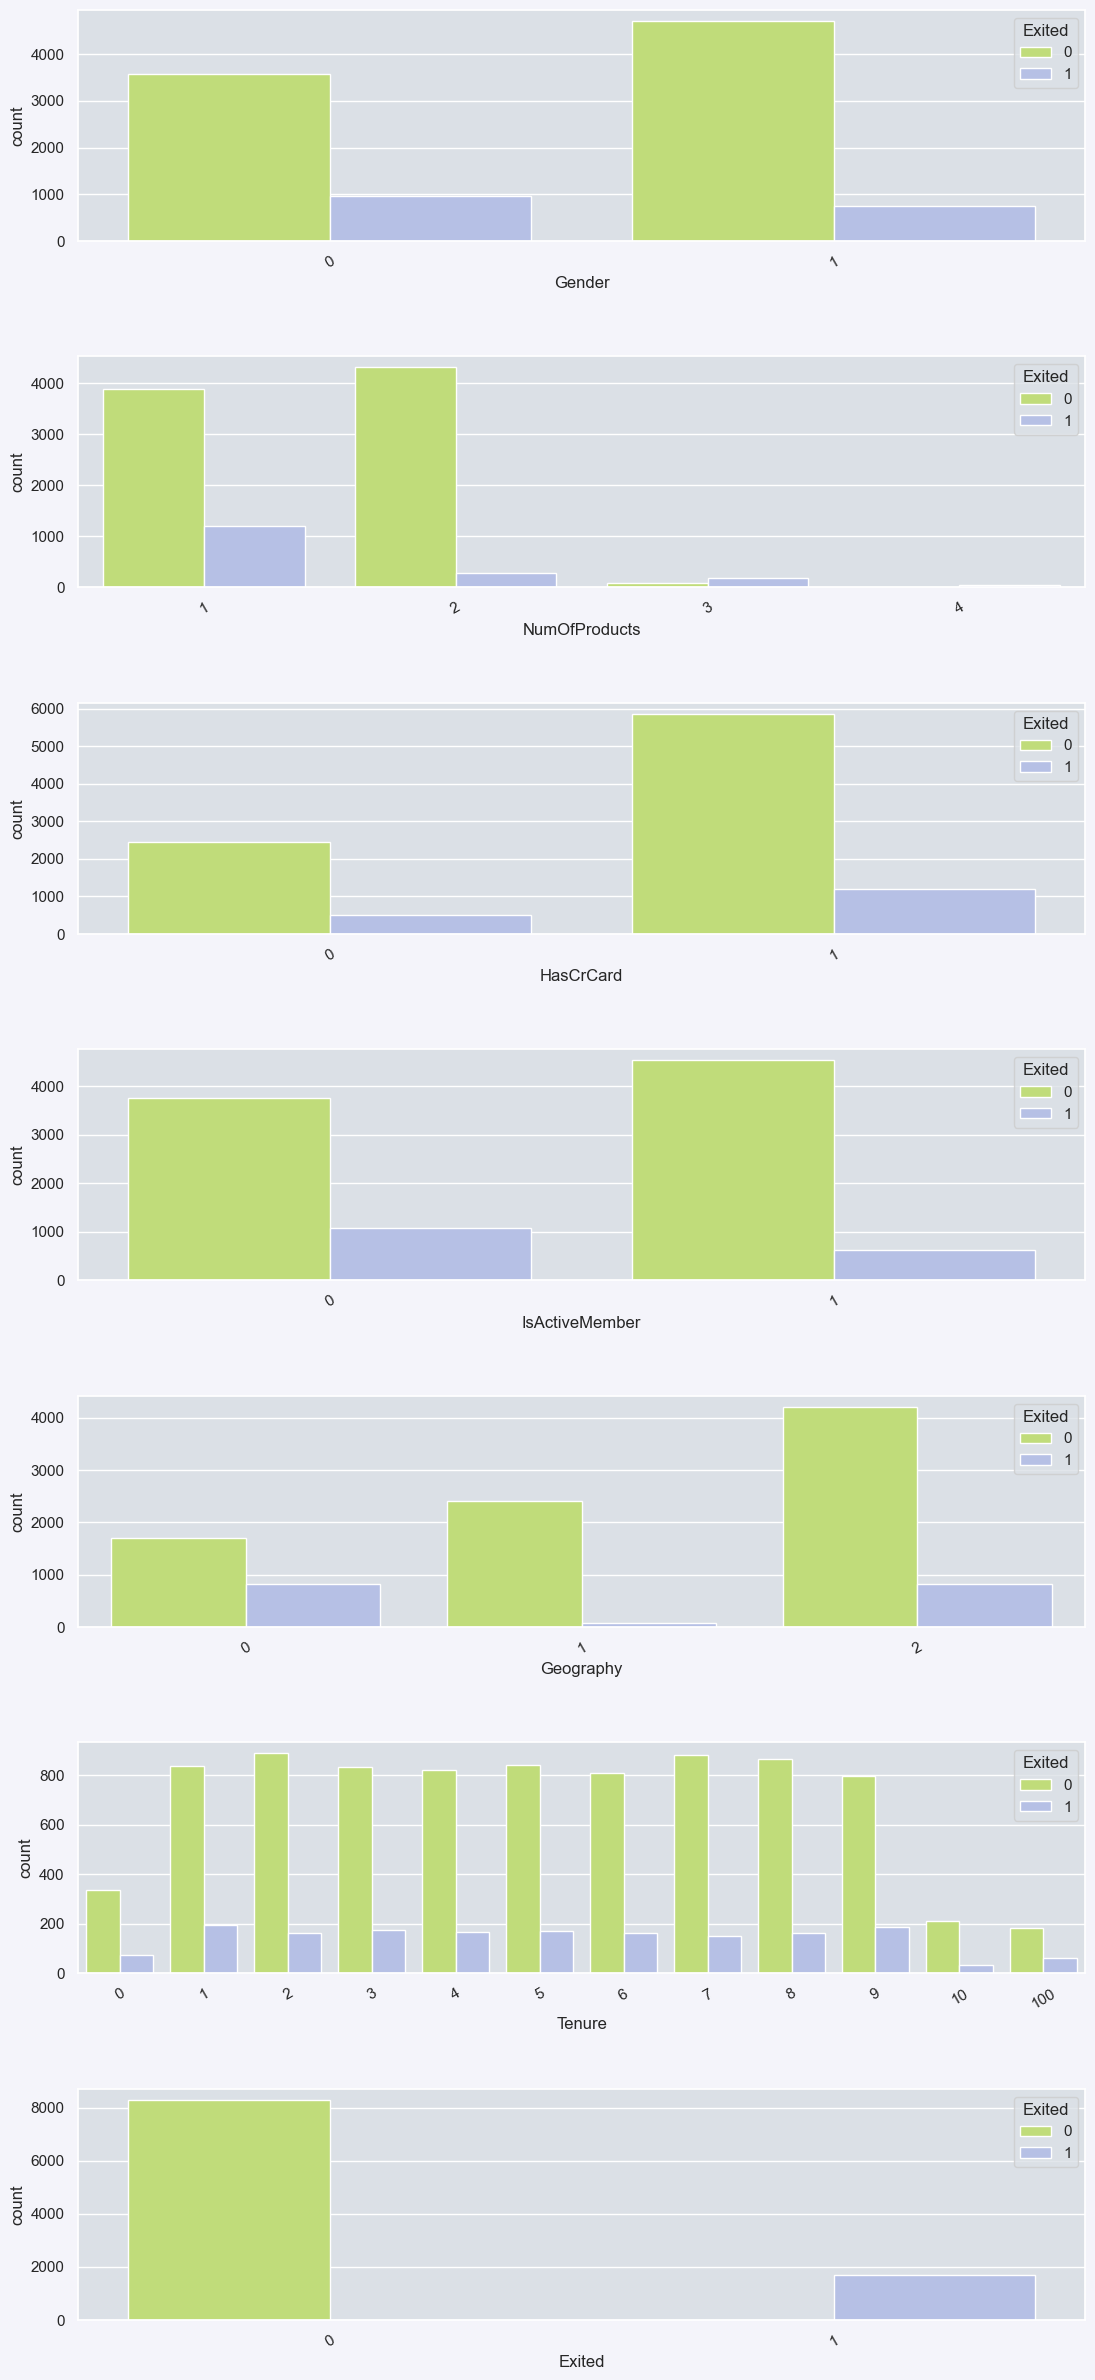

In [152]:
# Para las columnas categóricas miraremos las frecuencias y su relacion con Exited
FIGCON
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(13,30))
fig.subplots_adjust(hspace=0.5)

for num, col in enumerate(columns_category):
  sb.countplot(x=col, data=BANKDF, ax=ax[num], palette=[COLOR1,COLOR6], hue=BANKDF['Exited'])
  ax[num].set_xticklabels(ax[num].get_xticklabels(),rotation=30)

Observaciones:
- El género no influye a la decisión de irse o quedarse
- Los clientes con 3 y 4 productos tienen una muy alta probabilidad de abandonar
- Más del 50% de los clientes tienen tarjeta de crédito
- Anque los clientes estén inactivos, aún así no abandonan la entidad bancaria
- California son los clientes más fieles
- La mayoría de los clientes tienen entre 1 y 9 años con el banco. También podemos detectar que hay aproximadamente más de 200 registros erróneos que marcan clientes con 100 años con el banco. Procederemos a limpiar
- Tenemos más de 80% de registros de clientes que NO han dejado la entidad bancaria. Hay un desbalance en la variable a predecir

In [153]:
# Limpieza de outliers en Tenure
BANKDF = BANKDF[(BANKDF['Tenure']!=100)].reset_index(drop=True)
print("Número total de registros después de borrar outliers:", len(BANKDF))

Número total de registros después de borrar outliers: 9755


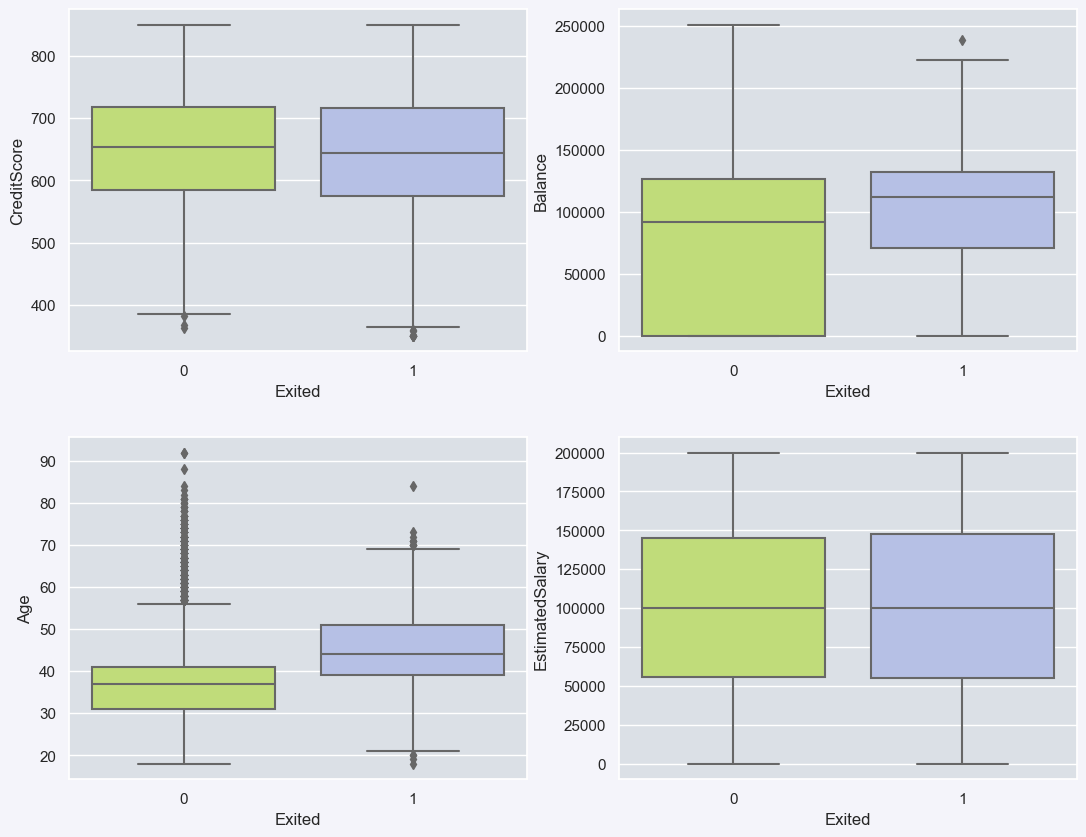

In [154]:
# Para las columnas numéricas utilizaremos gráficos de cajas para ver su distribución y la relación con Exited

columns_number = BANKDF.loc[:, BANKDF.dtypes != 'category'].columns

fig = plt.figure(figsize=(13,10))
for num, col in enumerate(columns_number):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(2,2,num+1)    
    sb.boxplot(x=BANKDF['Exited'], y=col, data=BANKDF, palette=[COLOR1,COLOR6])

Observaciones:
- Las variables numéricas tienen muy poca relación con el abandono
- El rango de edad que más deja la entidad bancaria es entre 39 y 52 años
- El mayor porcentaje de abandono lo tienen las personas cuyos balances están entre 60,000.00 y 130,000.00
- Procederemos a graficar la relación entre ellas para intentar identificar más patrones

<Figure size 1300x1000 with 0 Axes>

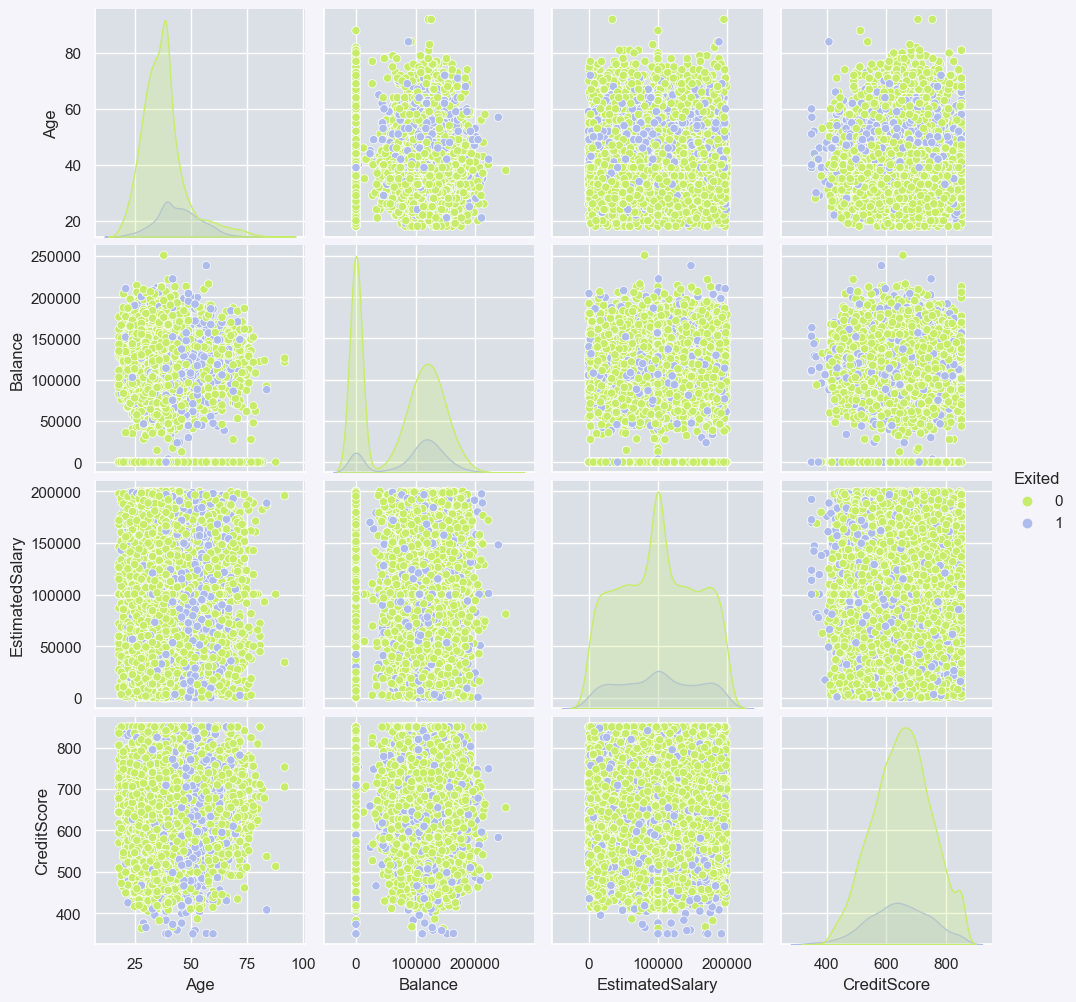

In [155]:
# Exploracion bivarial con respecto al abandono
FIGCON
To_plot = [ "Age", "Balance",'EstimatedSalary','CreditScore','Exited']
plt.figure(figsize=(13, 10))
sb.pairplot(BANKDF[To_plot], hue= "Exited",palette= ([COLOR1,COLOR6]), height=2.55) 
plt.show()

Observaciones:
- No se observan más patrones que el de la edad y el balance
- Exploraremos ahora la relación entre algunas variables categóricas y numéricas

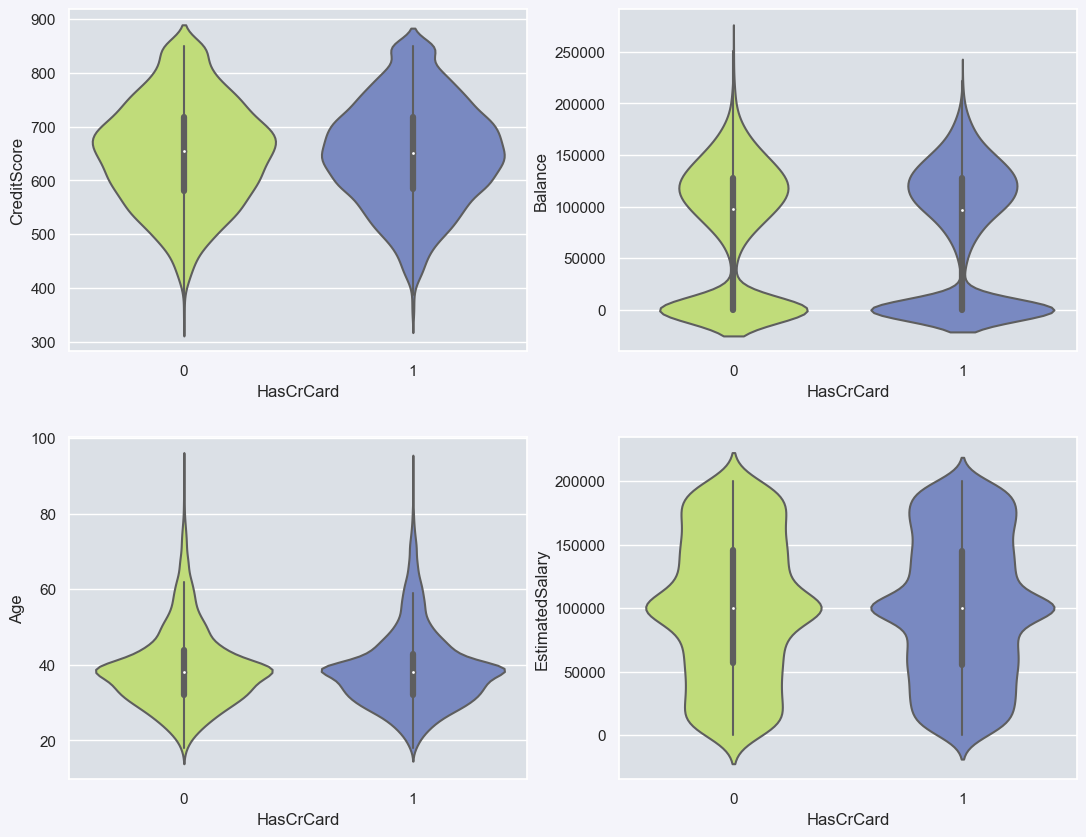

In [156]:
# Relación entre numéricas y si tienen tarjeta de credito

fig = plt.figure(figsize=(13,10))
for num, col in enumerate(columns_number):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(2,2,num+1)    
    sb.violinplot(x=BANKDF['HasCrCard'], y=col, data=BANKDF, palette=[COLOR1,COLOR5])

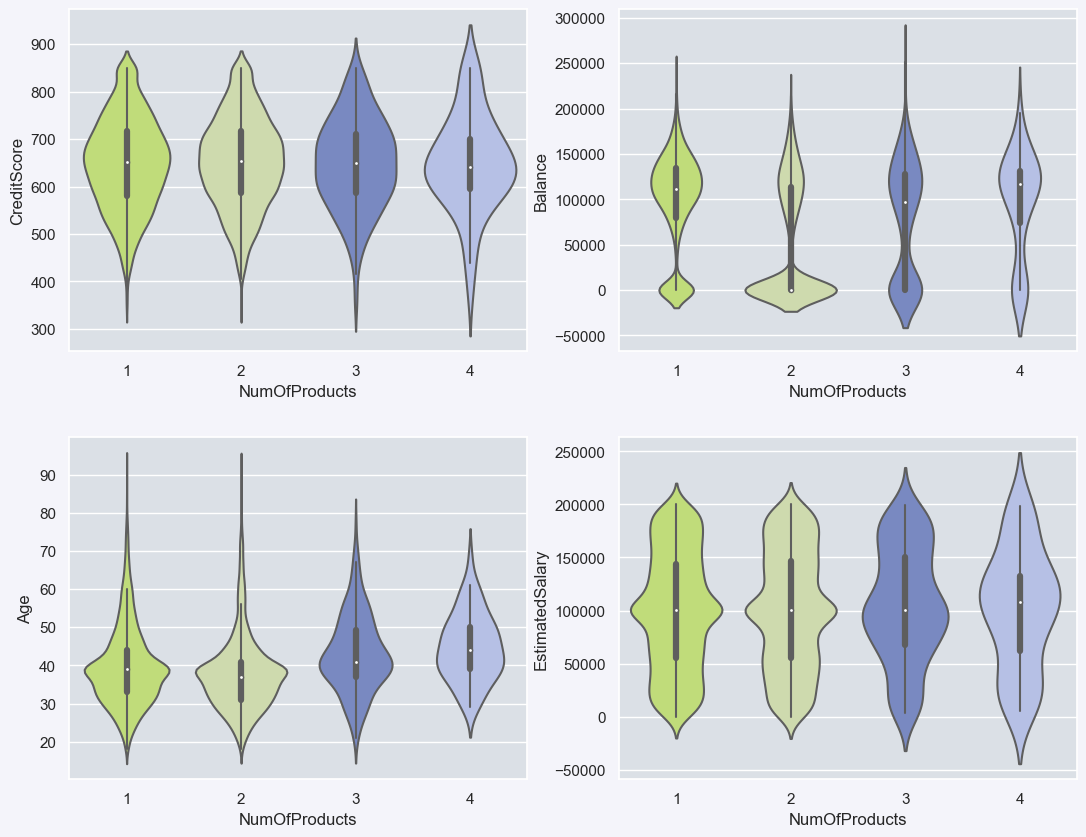

In [157]:
# Relación entre numéricas y numero de productos contratados

fig = plt.figure(figsize=(13,10))
for num, col in enumerate(columns_number):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(2,2,num+1)    
    sb.violinplot(x=BANKDF['NumOfProducts'], y=col, data=BANKDF, palette=[COLOR1,COLOR2,COLOR5,COLOR6])

Observaciones:
- La mayoría de las personas que tienen balance en 0 poseen dos productos. Contrastado con el gráfico de si tienen tarjeta de crédito podemos deducir que este es el segundo producto
- Quienes poseen 4 productos tienden a ser mayores de 40 años

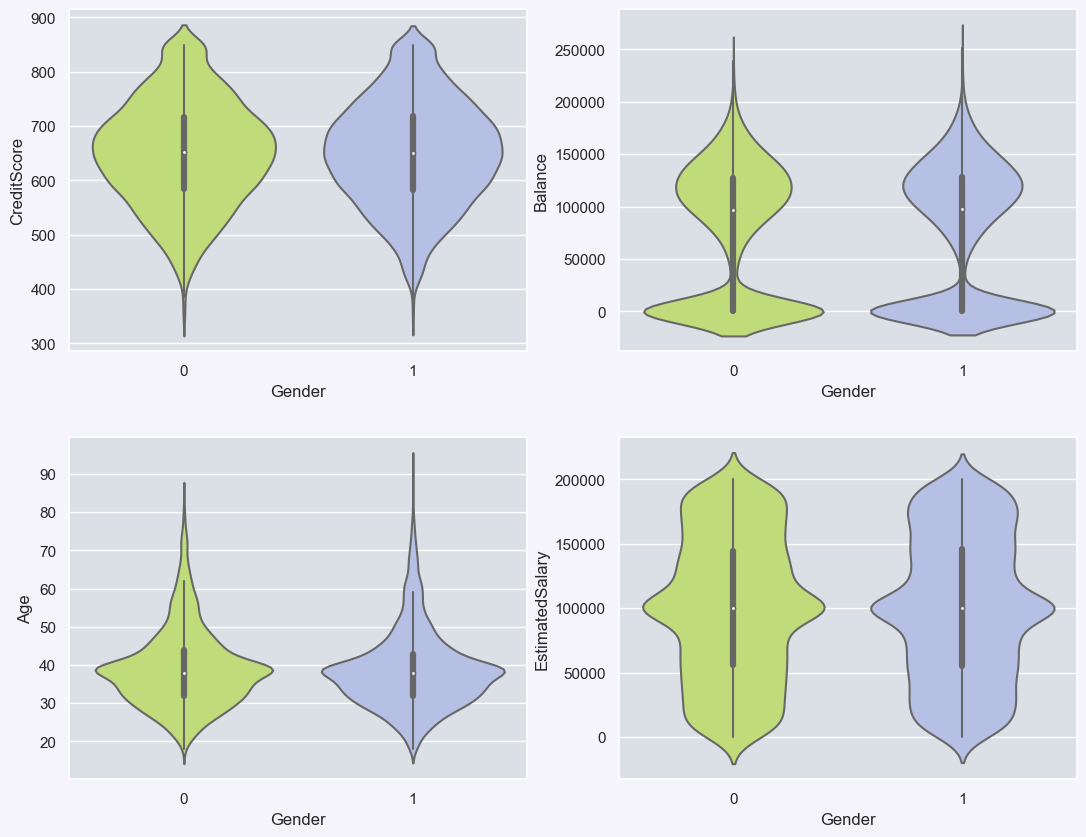

In [158]:
# Relación entre numéricas y el género

fig = plt.figure(figsize=(13,10))
for num, col in enumerate(columns_number):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(2,2,num+1)    
    sb.violinplot(x=BANKDF['Gender'], y=col, data=BANKDF, palette=[COLOR1,COLOR6])

<Axes: >

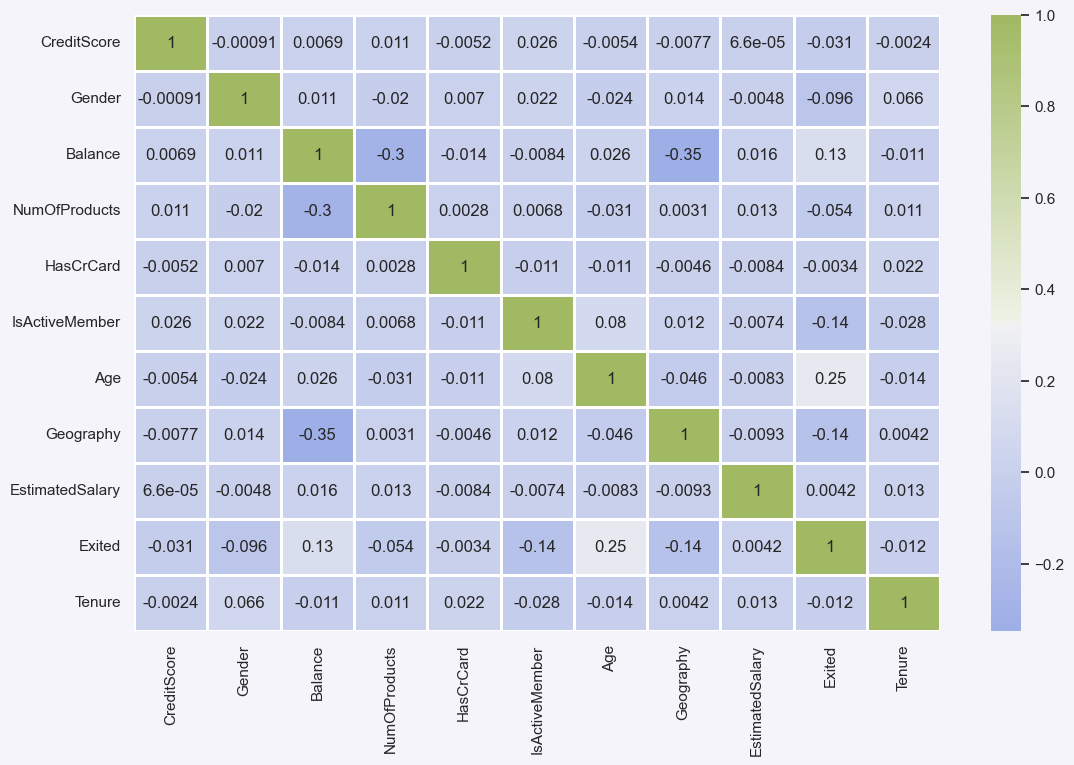

In [159]:
# Por último graficaremos la correlación del dataframe completo

corr_matrix = BANKDF.corr(method='pearson')
FIGCON
plt.figure(figsize=(13,8))
sb.heatmap(corr_matrix, annot= True, cmap = MAPAC, linewidths=.80)

Observaciones:

<p>De las gráficas podemos concluir que nuestras variables tienen muy poca relación entre sí y poca relación para poder predecir si el cliente se irá o no.</p>
Recurriremos al SelectKBest para poder conseguir las 4 variables más importantes para nuestra predicción

In [160]:
# Este código está realizando la selección de funciones mediante el método SelectKBest de la biblioteca 
# scikit-learn seleccionará las 4 funciones principales que tienen las estadísticas de chi-cuadrado 
# más altas entre las funciones y la variable de destino 'Exited' en el conjunto de datos BANKDF. 
# Luego, las características seleccionadas se transforman y se devuelven mediante el método fit_transform. 
# Finalmente, el método get_feature_names_out se usa para obtener los nombres 
# de las características seleccionadas.


selector_var = SelectKBest(score_func=chi2, k=5)
selector_var.fit_transform(X = BANKDF.loc[:, (BANKDF.columns != 'Exited')], y = BANKDF['Exited'])
selector_var.get_feature_names_out()

array(['CreditScore', 'Balance', 'Age', 'Geography', 'EstimatedSalary'],
      dtype=object)

<div align="center"><img src="https://i.postimg.cc/gkPdTK13/CONCLUSION.png" alt="2-4-head" border="0"></a></div>

- Aunque tenemos poca correlación, el *SelectKBest* nos identifica que **Balance**, **EstimatedSalary**, **CreditScore** y **Age** son las 4 variables más influyentes 
- Estamos trabajando con datos que poseen desbalance en la variable a predecir y al ser tan pocos no es recomendable hacer subsampling. Hay que tenerlo en cuenta en los siguentes pasos
- Necesitaremos un modelo de clasificación binaria y utilizaremos métricas de evaluación que sean recomendables para data desbalanceada

<div align="center"><img src="https://i.postimg.cc/pVKMzFyr/predicci-n.png" alt="2-4-head" border="0"></a></div>

<div align="center"><img src="https://i.postimg.cc/65wJ0pG0/subdivision.png" alt="2-4-head" border="0"></a></div>

Tras obtener las variables más influyentes procederemos a subdividir el dataset utilizando solo estas columnas para nuestra X y nos apoyaremos del *train_test_split* para realizar la subdivisión de datos para prueba y test  


In [161]:
X = BANKDF.loc[:,BANKDF.columns.isin(['Age','Balance','EstimatedSalary','CreditScore'])]
y = BANKDF.loc[:,'Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM)

<div align="center"><img src="https://i.postimg.cc/Zn6mq9v9/balanceo.png" alt="2-4-head" border="0"></a></div>

In [162]:
# Procedemos a crear muestras artificiales con el RandomOverSampler para comparar resultados en búsqueda de la mejor predicción del abandono de la entidad bancaria, ya que poseemos muy pocos registros de este tipo
ROs = RandomOverSampler()
X_trainROs, y_trainROs= ROs.fit_resample(X_train, y_train)

<div align="center"><img src="https://i.postimg.cc/gJZFMwDM/modelo-1.png" alt="2-4-head" border="0"></a></div>

In [163]:
# El primer modelo a probar será el Random Forest Classifier para los datos con muestras artificiales, 
# y el Balanced Random Forest para los datos con muestras reales

RF_ROs=RandomForestClassifier(random_state=RANDOM).fit(X_trainROs, y_trainROs)
RF_balanced = BalancedRandomForestClassifier(random_state=RANDOM).fit(X_train,y_train)

y_pred_ROs= RF_ROs.predict(X_test)
y_pred= RF_balanced.predict(X_test)

# Mostramos por pantalla el resultado con Random OverSampling

print(f'Puntuación Random Forest con Random OverSampling:\nTest: {RF_ROs.score(X_test, y_test)}')
print(f'Train: {RF_ROs.score(X_trainROs, y_trainROs)}\n\n{classification_report(y_test,y_pred_ROs)}')

# Mostramos por pantalla el resultado con Random Forest Balanced

print(f'\nPuntuación Random Forest Balanced:\nTest: {RF_balanced.score(X_test, y_test)}')
print(f'Train: {RF_balanced.score(X_train, y_train)}\n\n{classification_report(y_test,y_pred)}')

Puntuación Random Forest con Random OverSampling:
Test: 0.7980522808815992
Train: 1.0

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1625
           1       0.37      0.29      0.33       326

    accuracy                           0.80      1951
   macro avg       0.62      0.60      0.60      1951
weighted avg       0.78      0.80      0.79      1951


Puntuación Random Forest Balanced:
Test: 0.6740133264992312
Train: 0.8118913377754997

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1625
           1       0.29      0.65      0.40       326

    accuracy                           0.67      1951
   macro avg       0.60      0.66      0.59      1951
weighted avg       0.80      0.67      0.71      1951



Observaciones:

<li> Utilizando muestras artificiales generadas por <i>Random Over Sampling</i> obtenemos una mayor puntuación en la predicción total, pero el classification report nos deja ver que la predicción para el abandono de cliente <b>(1)</b> es pobre.
<li> El modelo <b>balanceado</b> de <i>Random Forest</i> nos da un resultado de predicción más bajo pero predice un poco mejor el abandono del cliente
<li> Ambos modelos tienen overfitting.

<div align="center"><img src="https://i.postimg.cc/mkWxKbpT/modelo-2.png" alt="2-4-head" border="0"></a></div>

In [164]:
# Nuestro segundo modelo a probar será el Decision Tree Classifier con los datos que tienen muestras artificiales, 
# y lo compararemos con el mismo pero pasando el hiperparámetro -balanced- para los datos reales
from sklearn.metrics import recall_score
DT_ROs=DecisionTreeClassifier(random_state=RANDOM).fit(X_trainROs, y_trainROs)
DT_balanced= DecisionTreeClassifier(random_state=RANDOM, class_weight='balanced').fit(X_train, y_train)

y_pred_ROs= DT_ROs.predict(X_test)
y_pred= DT_balanced.predict(X_test)

# Procedemos a mostrar por pantalla los resultados para el Decision Tree con muestras artificiales:

print(f'Puntuación Decision Tree con Random OverSampling:\nTest: {DT_ROs.score(X_test, y_test)}')
print(f'Train: {DT_ROs.score(X_trainROs, y_trainROs)}\n\n{classification_report(y_test,y_pred_ROs)}')

# Y ahora los resultados para Decision Tree con muestras reales balanceadas por hiperparámetro:

print(f'Puntuación Decision Tree con class_weight Balanced:\nTest: {DT_balanced.score(X_test, y_test)}')
print(f'Train: {DT_balanced.score(X_trainROs, y_trainROs)}\n\n{classification_report(y_test,y_pred)}')

Puntuación Decision Tree con Random OverSampling:
Test: 0.7565351101998975
Train: 1.0

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1625
           1       0.27      0.28      0.27       326

    accuracy                           0.76      1951
   macro avg       0.56      0.56      0.56      1951
weighted avg       0.76      0.76      0.76      1951

Puntuación Decision Tree con class_weight Balanced:
Test: 0.7560225525371604
Train: 1.0

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1625
           1       0.27      0.28      0.28       326

    accuracy                           0.76      1951
   macro avg       0.56      0.57      0.56      1951
weighted avg       0.76      0.76      0.76      1951



Observaciones:
<li> No hay casi diferencia entre la predicción con muestras artificiales y la que está balanceada con hiperparámetro
<li> Ambos modelos tienen mas overfitting que el <i>Random Forest</i>
<li> La predicción para el abandono es pobre

<div align="center"><img src="https://i.postimg.cc/2ydpDPgh/modelo_3.png" alt="2-4-head" border="0"></a></div>

In [165]:
# Nuestro último modelo a probar será el Support Vector Classification para datos con muestras artificiales,
# y el mismo con el hiperparámetro Class_weight Balanced para los datos reales

SVC_ROs=SVC(random_state=RANDOM).fit(X_trainROs, y_trainROs)
SVC_balanced= SVC(random_state=RANDOM, class_weight='balanced').fit(X_train, y_train)

y_pred_ROs= SVC_ROs.predict(X_test)
y_pred= SVC_balanced.predict(X_test)

# Mostramos por pantalla los resultados de SVC con muestras artificiales

print(f'Puntuación SVC con Random OverSampling:\nTest: {SVC_ROs.score(X_test, y_test)}')
print(f'Train: {SVC_ROs.score(X_trainROs, y_trainROs)}\n\n{classification_report(y_test,y_pred_ROs)}')

# Y los resultados de SVC balanceado con class_weight:
print(f'Puntuación SVC con class_weight:\nTest: {SVC_balanced.score(X_test, y_test)}')
print(f'Train: {SVC_balanced.score(X_train, y_train)}\n\n{classification_report(y_test,y_pred)}')

Puntuación SVC con Random OverSampling:
Test: 0.469502819067145
Train: 0.5874691738594328

              precision    recall  f1-score   support

           0       0.90      0.41      0.56      1625
           1       0.21      0.77      0.33       326

    accuracy                           0.47      1951
   macro avg       0.55      0.59      0.44      1951
weighted avg       0.78      0.47      0.52      1951

Puntuación SVC con class_weight:
Test: 0.469502819067145
Train: 0.4566888774987186

              precision    recall  f1-score   support

           0       0.90      0.41      0.56      1625
           1       0.21      0.77      0.33       326

    accuracy                           0.47      1951
   macro avg       0.55      0.59      0.44      1951
weighted avg       0.78      0.47      0.52      1951



Observaciones:
- El **SVC** es el modelo con menor overfitting y aunque es el que más baja puntuación de predicción tiene, es el que mayor puntuación de *Recall* tiene para la clase **1**.
- Tomamos como métrica principal el *Recall* para la clase **1** porque es el abandono del cliente, el registro con menos datos y que más importancia tiene, y el *Recall* nos devuelve el porcentaje de veces que se ha predicho correctamente.
- Teniendo en cuenta lo anterior, procederemos a la búsqueda de hiperparámetros con este modelo.


<div align="center"><img src="https://i.postimg.cc/Wzjsmq3g/hiperpara.png" alt="2-4-head" border="0"></a></div>

In [166]:
params_svc={'kernel':['linear','poly','sigmoid','precomputed'], 'gamma':['scale','auto']} 
random_search= RandomizedSearchCV(SVC_balanced, params_svc, random_state=RANDOM, n_iter=1).fit(X_train,y_train)
print(f'{random_search.best_params_}')

{'kernel': 'poly', 'gamma': 'scale'}


In [167]:
# Aplicamos los hiperparámetros arrojados

SVC_balanced= SVC(random_state=RANDOM, class_weight='balanced', kernel='poly', gamma='scale').fit(X_train, y_train)

y_pred= SVC_balanced.predict(X_test)

print(f'Puntuación SVC con class_weight:\nTest: {SVC_balanced.score(X_test, y_test)}')
print(f'Train: {SVC_balanced.score(X_train, y_train)}\n\n{classification_report(y_test,y_pred)}')

Puntuación SVC con class_weight:
Test: 0.6591491542798564
Train: 0.6455663762173245

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1625
           1       0.21      0.37      0.27       326

    accuracy                           0.66      1951
   macro avg       0.53      0.54      0.52      1951
weighted avg       0.74      0.66      0.69      1951



Observación:

<li><i>Randomized Search</i> nos arroja que los mejores hiperparámetros son <i>Kernel: Poly</i> y <i>Gamma: Scale</i>. Al aplicarlos nos sube la predicción general pero empeora la predicción de <b>1</b>. Por lo tanto descartamos
<li><i>Random Forest Balancead</i> fue el segundo modelo con mejor puntuación de <i>Recall</i> así que procederemos a realizar búsqueda de hiperparámetros con este modelo

In [168]:
params_RF={'n_estimators':[100,150,200,250], 'criterion':['gini','entropy']}
random_search = RandomizedSearchCV(RF_balanced, params_RF, random_state=RANDOM).fit(X,y)
print(f'{random_search.best_params_}')

{'n_estimators': 100, 'criterion': 'entropy'}


In [169]:
# Aplicamos los hiperparámetros arrojados (el estimator 100 es el que viene por defecto, por eso no lo definiremos) y volvemos a predecir

RF_balanced = BalancedRandomForestClassifier(random_state=RANDOM, criterion='entropy').fit(X_train,y_train)

y_pred=RF_balanced.predict(X_test)

print(f'\nPuntuación Random Forest Balanced:\nTest: {RF_balanced.score(X_test, y_test)}')
print(f'Train: {RF_balanced.score(X_train, y_train)}\n\n{classification_report(y_test,y_pred)}')


Puntuación Random Forest Balanced:
Test: 0.6776012301383906
Train: 0.8117631983598155

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1625
           1       0.29      0.64      0.40       326

    accuracy                           0.68      1951
   macro avg       0.60      0.66      0.59      1951
weighted avg       0.80      0.68      0.72      1951



Observación:

<li> Sólo nos ha mejorado la puntuación general un 0.0036 y nos ha bajado el <i>Recall</i> para <b>1</b>. Descartamos.
<li> Intentaremos mejorar cambiando la subdivisión de <b>Test</b> y <b>Train</b>

In [170]:
# Probaremos utilizando todo el dataset y no solo las variables más importantes

X = BANKDF.loc[:,~BANKDF.columns.isin(['Exited','HasCrCard'])]
y = BANKDF.loc[:,'Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM)

In [171]:
RF_balanced = BalancedRandomForestClassifier(random_state=RANDOM).fit(X_train,y_train)

y_pred=RF_balanced.predict(X_test)

print(f'\nPuntuación Random Forest Balanced:\nTest: {RF_balanced.score(X_test, y_test)}')
print(f'Train: {RF_balanced.score(X_train, y_train)}\n\n{classification_report(y_test,y_pred)}')


Puntuación Random Forest Balanced:
Test: 0.805228088159918
Train: 0.8885187083546899

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      1625
           1       0.45      0.77      0.57       326

    accuracy                           0.81      1951
   macro avg       0.70      0.79      0.72      1951
weighted avg       0.86      0.81      0.82      1951



In [172]:
# Con nuestro modelo entrenado comparamos los resultados con el 100% de nuestro dataset

Prediccion=RF_balanced.predict(X)

print(f'{classification_report(y,Prediccion)}')

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8113
           1       0.57      0.95      0.71      1642

    accuracy                           0.87      9755
   macro avg       0.78      0.90      0.82      9755
weighted avg       0.92      0.87      0.88      9755



<div align="center"><img src="https://i.postimg.cc/gkPdTK13/CONCLUSION.png" alt="2-4-head" border="0"></a></div>

<li>A pesar de que en el heatmap con la correlación de Pearson parecía que había muy poca relación entre las variables, nuestro modelo predice mucho mejor cuando incluimos casi todas las variables en la <b>X</b>. 
<li>Podemos predecir un 77% de la veces correctamente el abandono de la entidad bancaria por parte de un usuario entrenando el modelo de predicción <b>BalancedRandomForestClassifier</b> con los hiperparámetros que trae por defecto 
<li>No ha sido necesaria la creación de muestras artificiales para balancear nuestros datos
<li>Hemos evaluado la eficacia de nuestro modelo utilizando la métrica de <i>Recall</i>, dándole mayor peso al porcentaje de acierto para predecir la clase <b>1</b> que es el abandono de los usuarios

<div align="center"><img src="https://i.postimg.cc/BvtGK71f/clusteri.png" alt="2-4-head" border="0"></a></div>

En esta sección entrenaremos modelos de clusterización para obtener una nueva agrupación para los perfiles de clientes que tenemos:
- Vamos a definir una X que usaremos para entrenar los modelos
- Nos apoyaremos en los métodos de la silueta y la dispersión para encontrar la cantidad de clústeres apropiados para nuestro dataset
- Al ser modelo no supervisado utilizaremos gráficas para poder analizar el perfil de las agrupaciones creadas.
- Repetiremos el proceso con otro modelo para poder comparar cuál es la mejor agrupación resultante

<div align="center"><img src="https://i.postimg.cc/gJZFMwDM/modelo-1.png" alt="2-4-head" border="0"></a></div>

In [173]:
# Definimos nuestra X que será el dataframe sin la columna EXITED

X= BANKDF.loc[:,~BANKDF.columns.isin(['Exited'])]

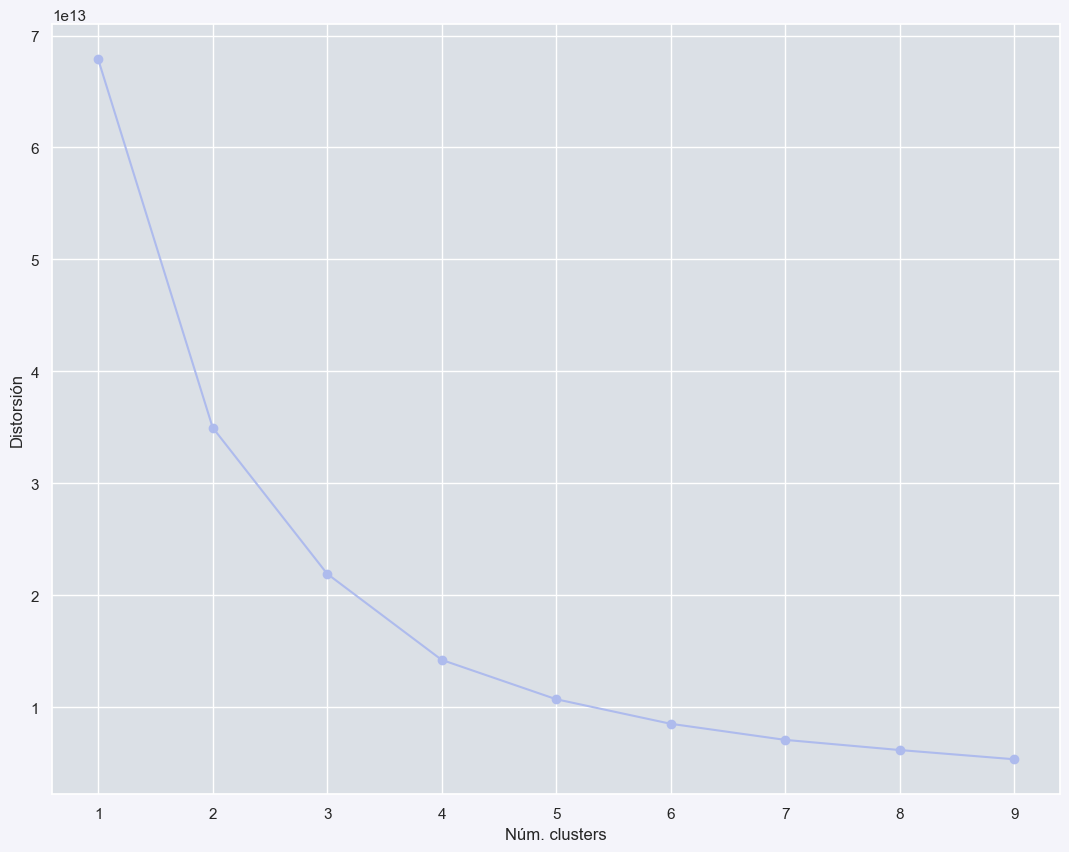

In [174]:
# Utilizamos el método de dispersión para comprobar el número ideal de clústeres 

distorsion = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, n_init=10).fit(X)
    distorsion.append(kmeans.inertia_)
plt.figure(figsize=(13, 10)) 
plt.xlabel("Núm. clusters")
plt.ylabel("Distorsión")
plt.plot(range(1, 10), distorsion, 'o-', c=COLOR6)

El método del codo nos devuelve un total de entre 3 y 4 clusteres

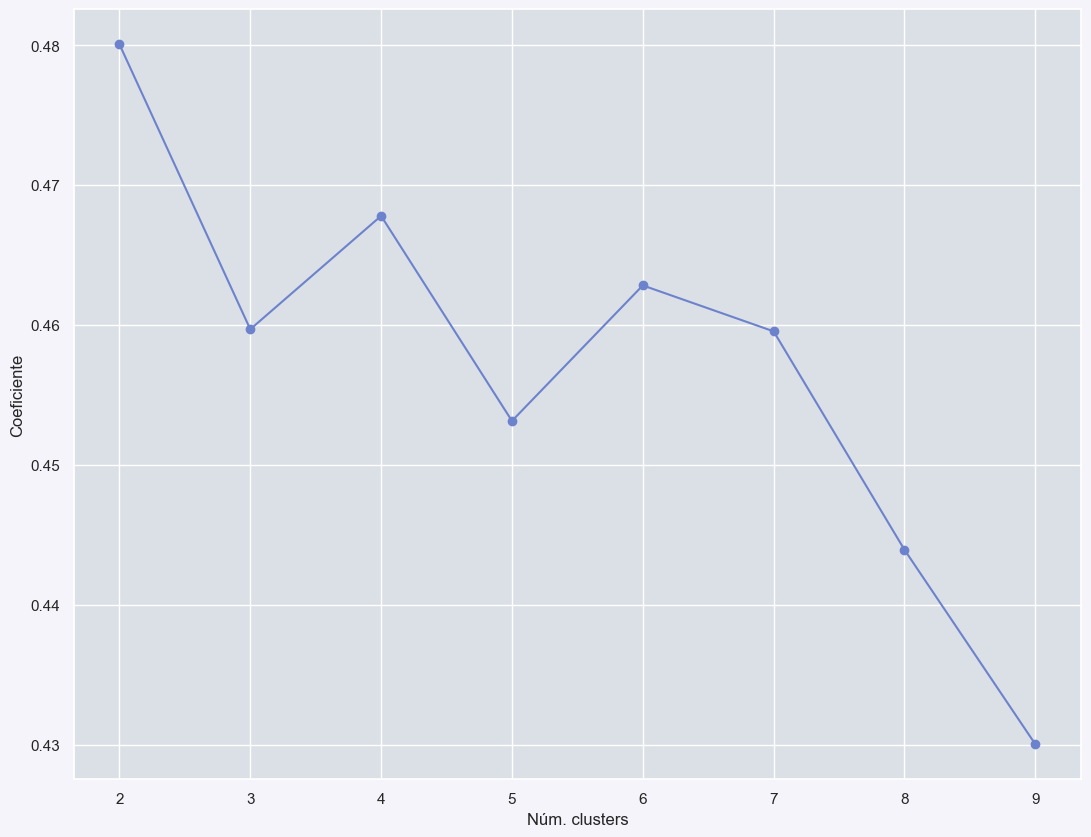

In [175]:
# Comprobaremos utilizando el método de la silueta

coef_avgs = []
for k in range(2, 10): 
    kmeans = KMeans(n_clusters = k, n_init=10).fit(X)
    coef_avgs.append(silhouette_score(X, kmeans.labels_))
plt.figure(figsize=(13, 10))
plt.xlabel("Núm. clusters")
plt.ylabel("Coeficiente")
plt.plot(range(2, 10), coef_avgs, 'o-', c=COLOR5)

El método de la silueta nos devuelve que el 2 es el número ideal. Procederemos utilizando 2 clústeres y más adelante comprobaremos con 4

In [176]:
# Inicializa el algoritmo k-means con k=2 clusters

kmeans = KMeans(n_clusters=2, random_state=RANDOM)
kmeans.fit(X) 
resultado = kmeans.predict(X)
BANKDF['Clusteres'] = resultado

Asignamos la etiqueta al Dataframe, al ser un modelo no supervisado no tenemos manera de comprobar el error, así que recurrimos a la exploración gráfica para intentar definir el perfil de agrupación resultante

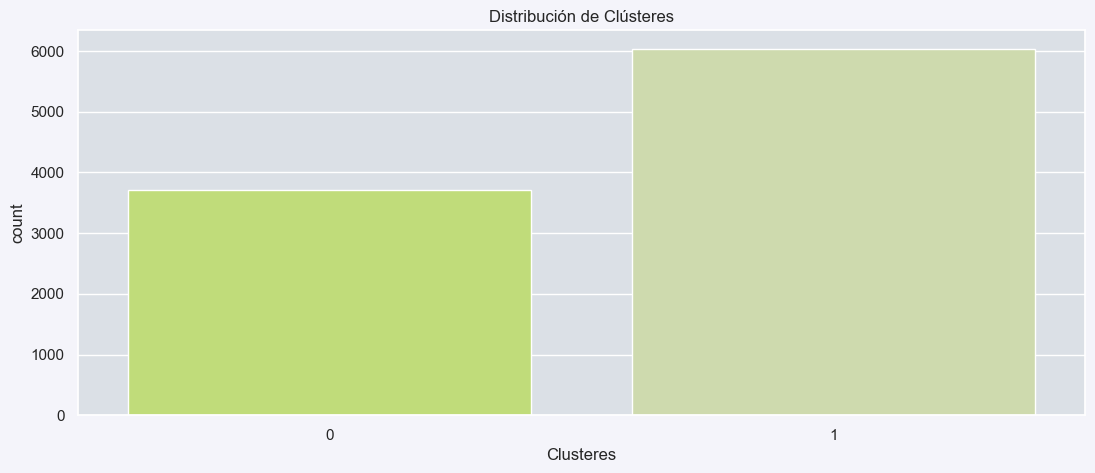

In [177]:
# Distribución de los clústeres resultantes
fig, ax = plt.subplots(figsize=(13,5))
pl = sb.countplot(x=BANKDF["Clusteres"], palette= PALETA)
pl.set_title("Distribución de Clústeres")
plt.show()

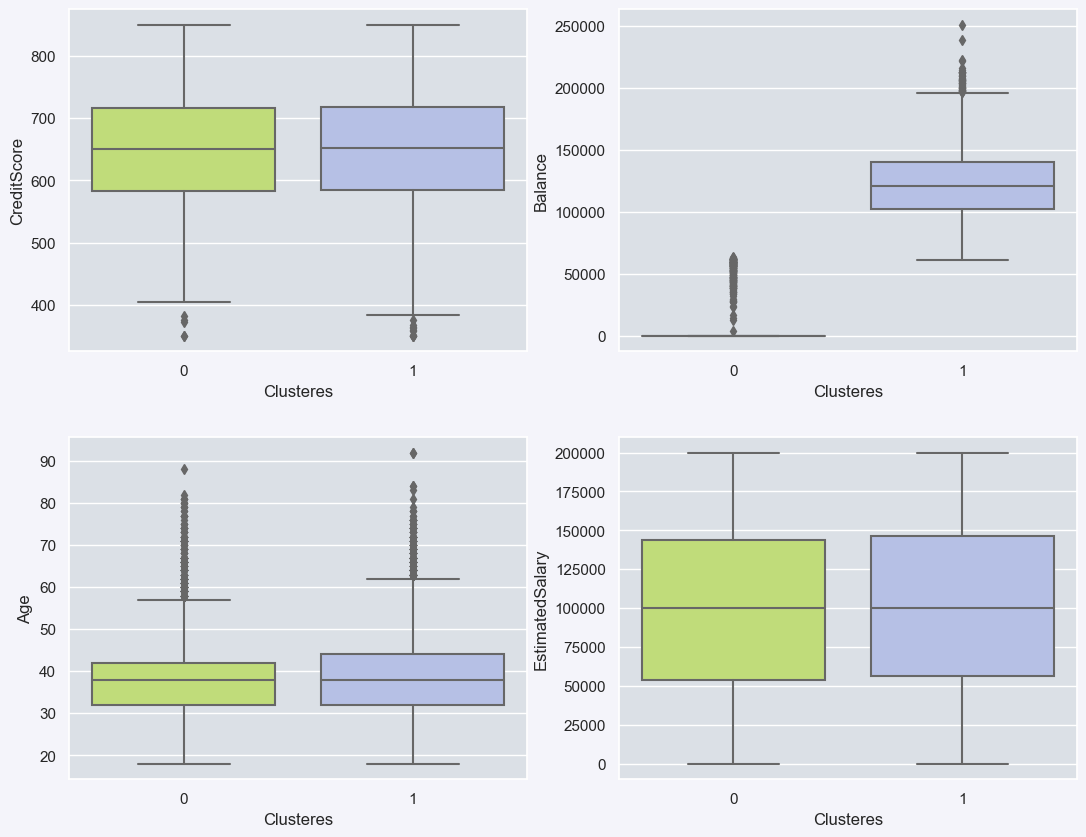

In [178]:
fig = plt.figure(figsize=(13,10))
for num, col in enumerate(columns_number):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(2,2,num+1)    
    sb.boxplot(x=BANKDF['Clusteres'], y=col, data=BANKDF, palette=[COLOR1,COLOR6])

<Figure size 1300x1000 with 0 Axes>

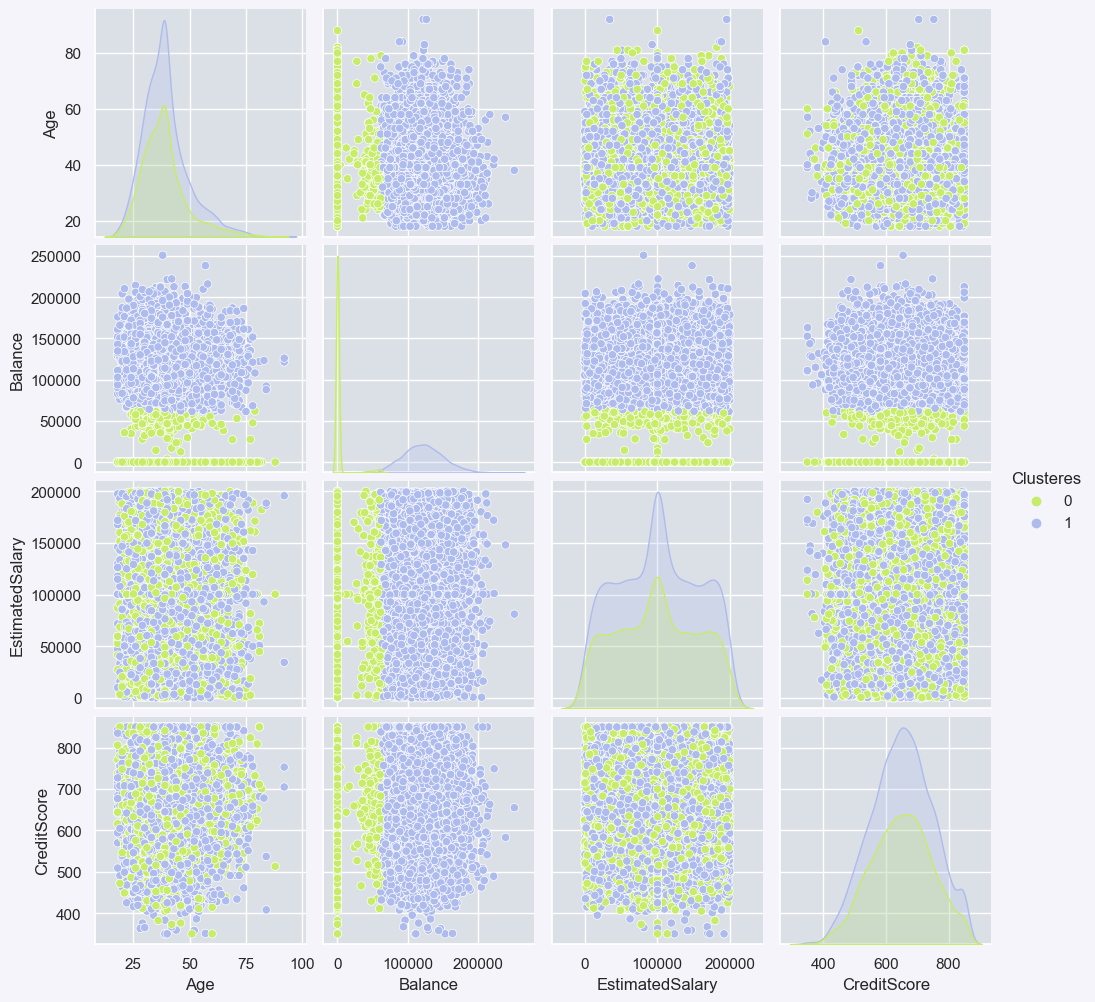

In [179]:
# Relación entre las variables numéricas y el cluster
FIGCON
To_plot = [ "Age", "Balance",'EstimatedSalary','CreditScore','Clusteres']
plt.figure(figsize=(13, 10))
sb.pairplot(BANKDF[To_plot], hue= "Clusteres",palette= ([COLOR1,COLOR6]), height=2.55) 
plt.show()

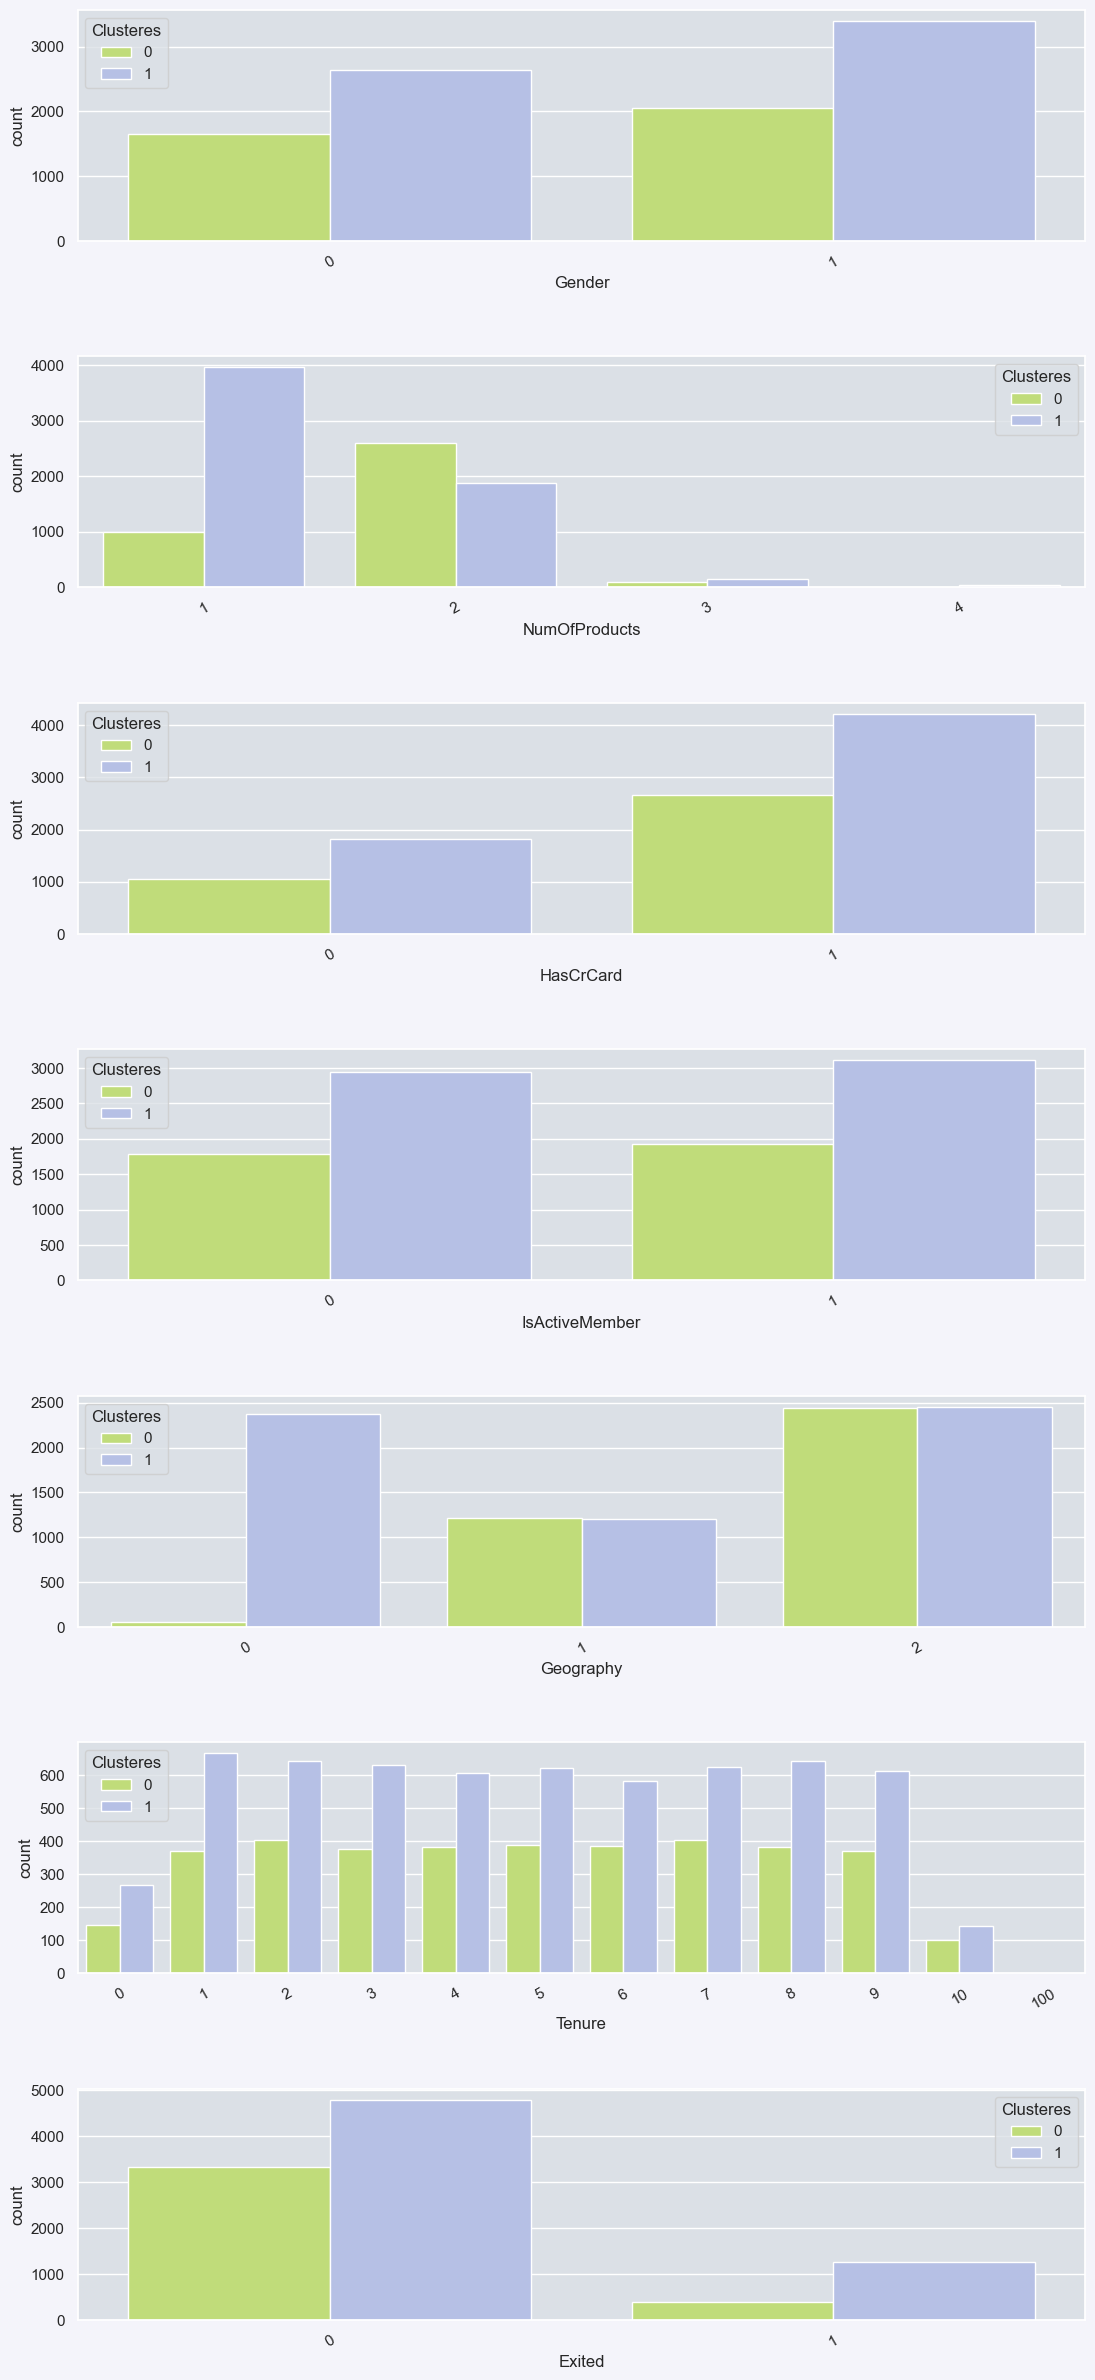

In [180]:
# Relacion entre las variables categoricas y el cluster
FIGCON
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(13,30))
fig.subplots_adjust(hspace=0.5)

for num, col in enumerate(columns_category):
  sb.countplot(x=col, data=BANKDF, ax=ax[num], palette=[COLOR1,COLOR6], hue=BANKDF['Clusteres'])
  ax[num].set_xticklabels(ax[num].get_xticklabels(),rotation=30)

Por último compararemos las relaciones entre un par de variables numéricas y categóricas. En concreto:
<ul><li>-HasCrCard</li>
<li>-NumOfProducts</li>
<li>-CreditScore</li>
<li>-Balance</li>
<li>-EstimatedSalary</li></ul>

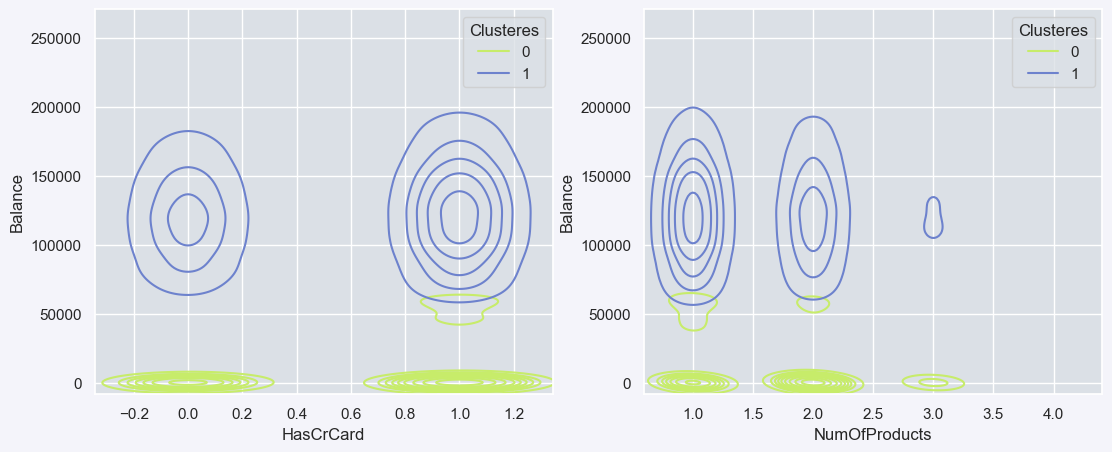

In [181]:
# Relación entre las categorias de Tarjeta de Crédito y Numero de productos contra el balance de la cuenta

categoricaldf = BANKDF[['HasCrCard','NumOfProducts']].astype(int)
fig = plt.figure(figsize=(13,5))
for num, col in enumerate(categoricaldf):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(1,2,num+1)    
    sb.kdeplot(x=categoricaldf[col], y=BANKDF['Balance'], palette=[COLOR1,COLOR5], hue=BANKDF['Clusteres'])

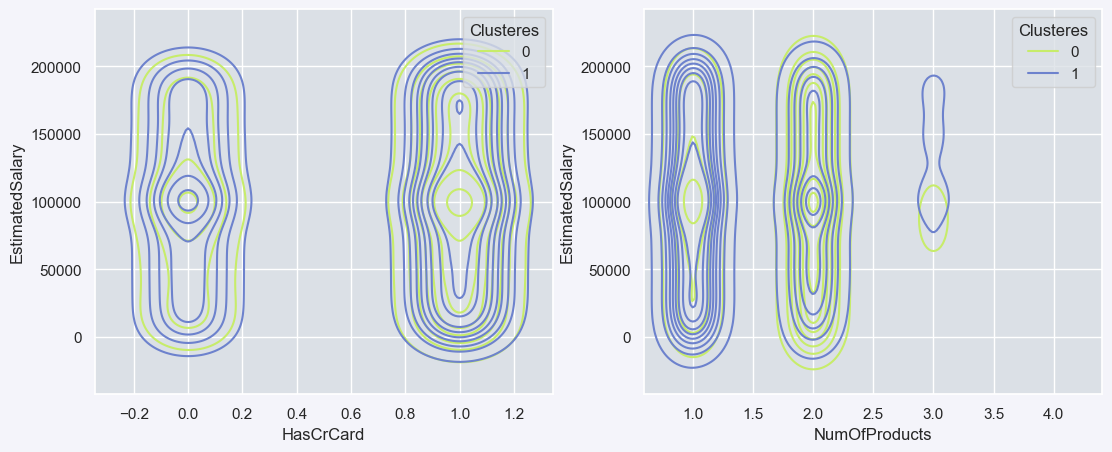

In [182]:
# Relación entre las categorias de Tarjeta de Crédito y Numero de productos contra el salario estimado

categoricaldf = BANKDF[['HasCrCard','NumOfProducts']].astype(int)
fig = plt.figure(figsize=(13,5))
for num, col in enumerate(categoricaldf):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(1,2,num+1)    
    sb.kdeplot(x=categoricaldf[col], y=BANKDF['EstimatedSalary'], palette=[COLOR1,COLOR5], hue=BANKDF['Clusteres'])

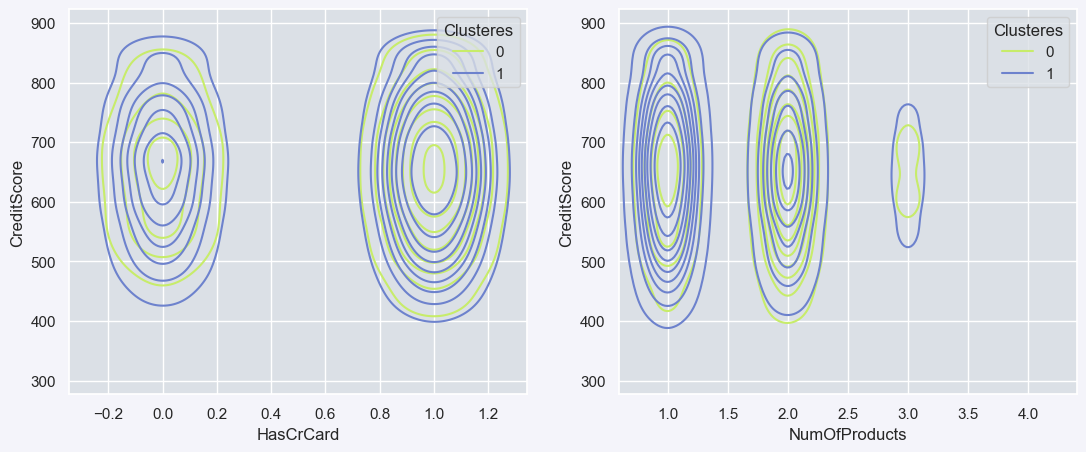

In [183]:
# Relación entre las categorias de Tarjeta de Crédito y Numero de productos contra el credit score

categoricaldf = BANKDF[['HasCrCard','NumOfProducts']].astype(int)
fig = plt.figure(figsize=(13,5))
for num, col in enumerate(categoricaldf):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(1,2,num+1)    
    sb.kdeplot(x=categoricaldf[col], y=BANKDF['CreditScore'], palette=[COLOR1,COLOR5], hue=BANKDF['Clusteres'])

## Análisis de resultados del primer modelo:

### Cluster 0:
- Son clientes con menos de 10.000 de balance 
- Su Salario medio es menor a 11.000
- Tienen una distribución balanceada de genéro con leve tendencia al masculino
- La mayoría tiene 2 productos con el banco y ninguno llega a tener 4
- Suelen contratar menos Tarjetas de Crédito que el cluster 1
- Muy pocos son del estado de Alabama

### Cluster 1:
- Son quienes tienen mayor balance en sus cuentas
- La misma distribución de género que el clúster 0
- Más del 50% solo tiene 1 producto con el banco, pero son los únicos que pueden poseer hasta 4
- Tienen mayor tendencia a contratar Tarjeta de Crédito
- Son en su mayoría de Alabama y Texas

<div align="center"><img src="https://i.postimg.cc/mkWxKbpT/modelo-2.png" alt="2-4-head" border="0"></a></div>

Para este modelo vamos a usar el Hierarchical Clustering:
- Lo primero que haremos será una copia del dataset y deshacernos de la columna Gender; dado que tiene una distribución tan equitativa, no parece que influya en ningún tipo de creación de perfil para los clientes
- A esta misma copia le quitaremos las agrupaciones previas de 'Exited' y Clusteres
- Redimencionaremos el Dataset resultante y lo utilizaremos para a entrenar y predecir

In [184]:
BANKCOPY = BANKDF.copy()
BANKCOPY.drop(columns=['Gender','Clusteres','Exited'], inplace=True)
BANKCOPY.sample(5)

CreditScore   Balance NumOfProducts HasCrCard IsActiveMember   Age   
3226          786      0.00             1         1              1 39.00  \
4790          523 161588.89             1         1              1 34.00   
1035          710      0.00             2         1              1 38.00   
9718          740 126524.11             1         1              0 33.00   
6346          613 125167.74             1         1              0 27.00   

     Geography  EstimatedSalary Tenure  
3226         2        165702.64      8  
4790         2         51358.66      2  
1035         1        136390.88      4  
9718         0        136869.31      2  
6346         2        199104.52      5

Ya que nuestro dataset tiene muy poca relación entre sus variables vamos a recurrir al proceso de la redimensión, para intentar conseguir una agrupación más robusta quedándonos solo con 3 columnas resultantes de la transformación

In [185]:
# Procedemos a redimensionar la copia creada
pca = PCA(n_components=3)
pca.fit(BANKCOPY)
BANKCOPY = pd.DataFrame(pca.transform(BANKCOPY), columns=(["col1","col2", "col3"]))
BANKCOPY.describe()

col1       col2    col3
count   9755.00    9755.00 9755.00
mean      -0.00      -0.00    0.00
std    62502.15   55253.79   96.61
min   -83030.83 -104503.89 -200.47
25%   -74302.55  -45055.45  -66.97
50%    20257.59     755.17   -1.43
75%    51152.85   44882.39   66.71
max   172687.64  107883.80  301.15

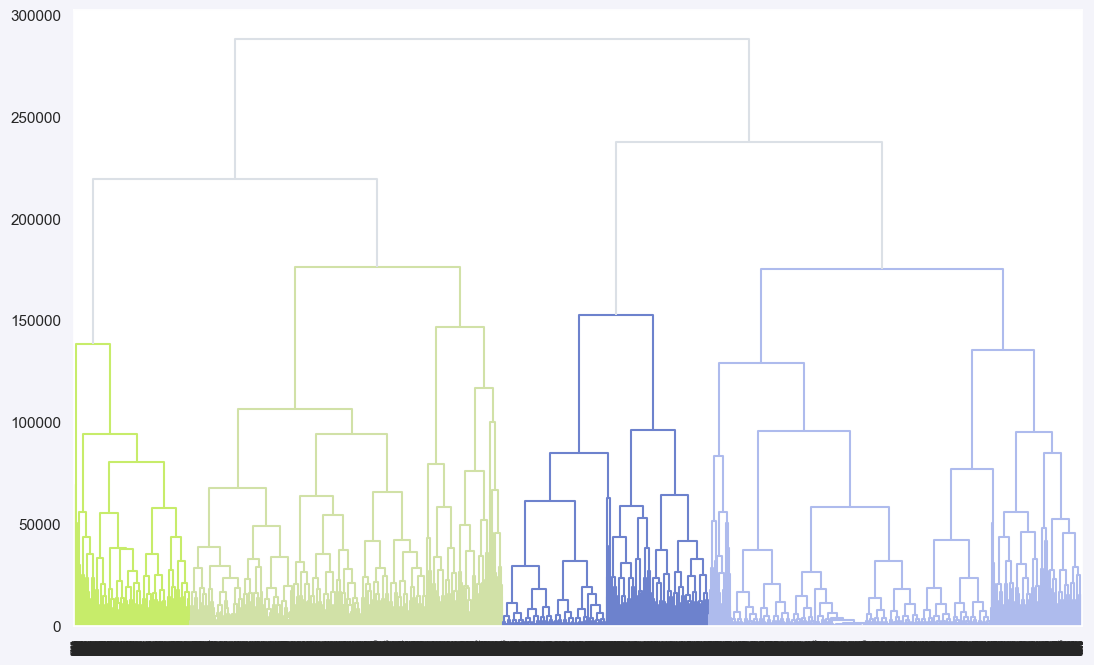

In [186]:
# Este código realiza un agrupamiento jerárquico de los datos almacenados en la variable 'BANKCOPY' utilizando el método de enlace completo y la métrica de distancia euclidiana. 
# A continuación, crea un diagrama de dendrograma de la agrupación jerárquica resultante, con el color de los vínculos entre las agrupaciones determinado por la paleta de colores especificada por
# {hierarchy.set_link_color_palette}. El gráfico resultante se muestra usando 'plt.show()'.

hierarchy.set_link_color_palette([COLOR1,COLOR2,COLOR5,COLOR6])
res = linkage(BANKCOPY, method="complete", metric="euclidean")
fig = plt.figure(figsize=(13, 8))
dendrogram(res, above_threshold_color=COLOR4)
plt.show()

Nuestro Dendrograma nos muestra 4 posibles clústeres para el set de datos. Procedemos a guardarlos y a asignarlos al dataset original para realizar el análisis de perfil

In [187]:
# Asignación de etiquetas al Dataset

etiquetas = cut_tree(res, n_clusters=4).reshape(-1, )
BANKDF['Etiquetas']= etiquetas
BANKDF.sample(5)

CreditScore Gender   Balance NumOfProducts HasCrCard IsActiveMember   
3096          677      1      0.00             2         1              0  \
1441          649      0  92786.66             1         1              0   
6402          840      0  87779.83             1         0              1   
2993          609      1  71872.19             1         1              1   
278           675      1 113208.86             2         1              0   

       Age Geography  EstimatedSalary Exited Tenure  Clusteres  Etiquetas  
3096 40.00         1         88947.56      0      5          0          0  
1441 45.00         2        173365.90      1      5          1          0  
6402 51.00         0         36687.11      1      1          1          2  
2993 32.00         2        151924.90      0      7          1          0  
278  40.00         2         34577.36      0      7          1          2

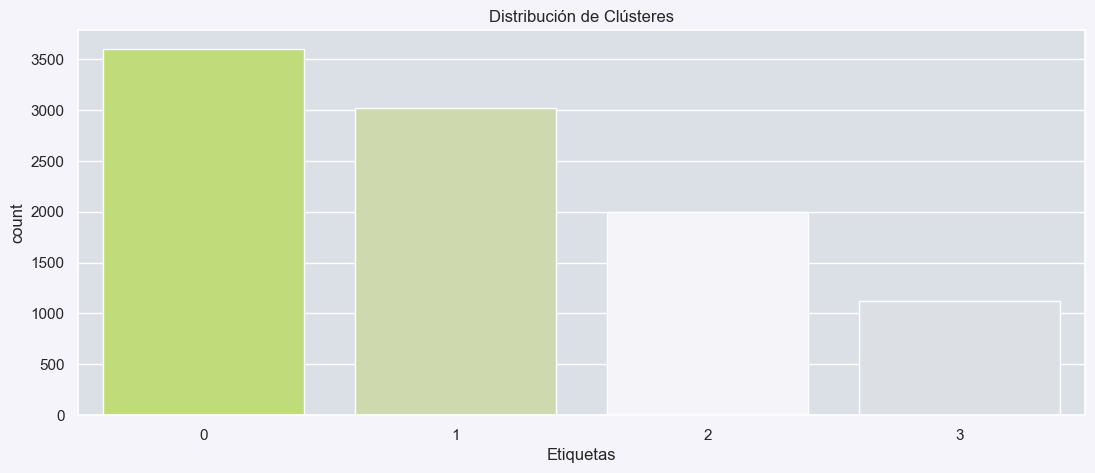

In [188]:
# Distribución de los clústeres resultantes

fig, ax = plt.subplots(figsize=(13,5))
pl = sb.countplot(x=BANKDF["Etiquetas"], palette= PALETA)
pl.set_title("Distribución de Clústeres")
plt.show()

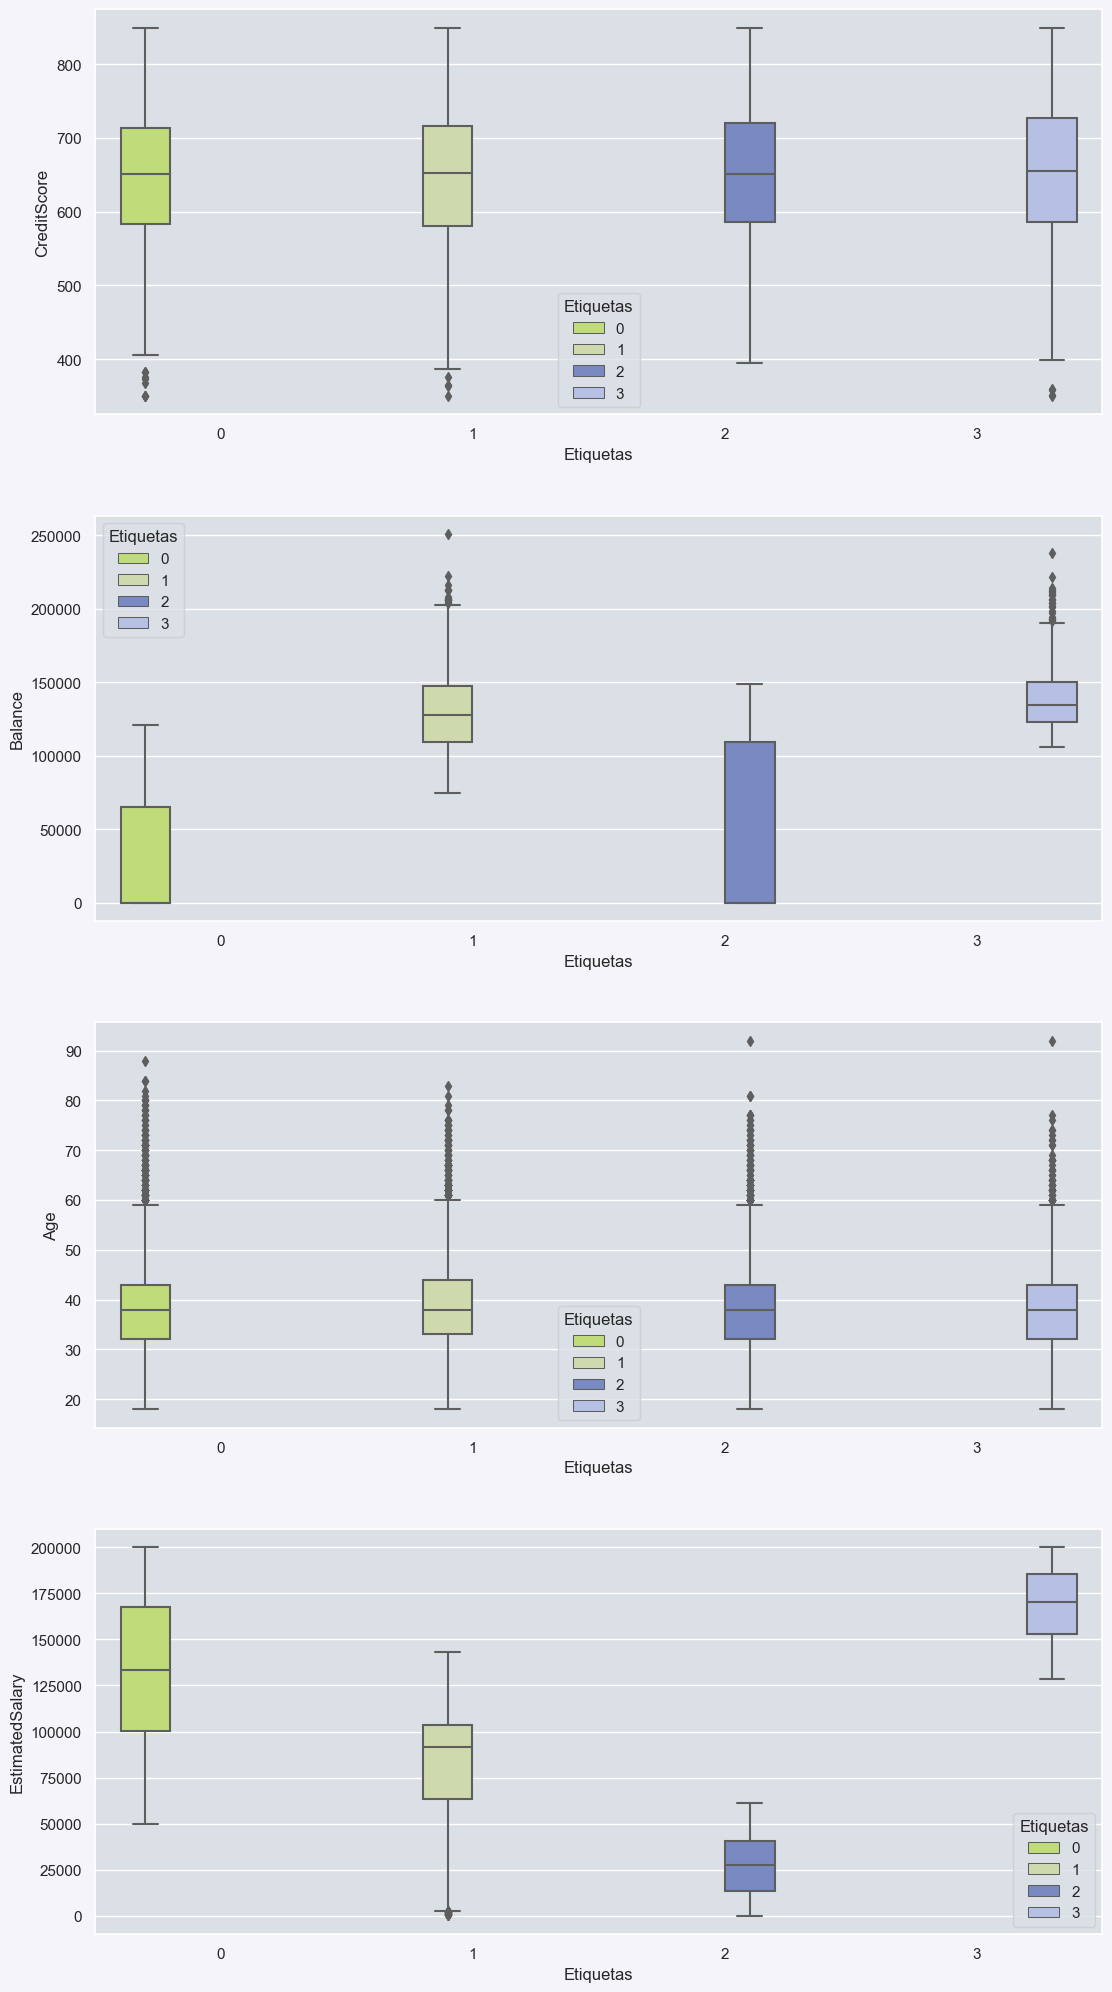

In [189]:
# Para las columnas numéricas utilizaremos gráficos de cajas para ver su distribución y la relación con la Etiqueta

columns_number = BANKDF.loc[:, BANKDF.dtypes != 'category'].columns

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(13,25))
fig.subplots_adjust(hspace=.25)

for num, col in enumerate(columns_number[:-2]):
  bplt = sb.boxplot(x=BANKDF['Etiquetas'], y=col, data=BANKDF, ax=ax[num], palette=[COLOR1,COLOR2,COLOR5,COLOR6], hue=BANKDF['Etiquetas'])

<Figure size 1300x1000 with 0 Axes>

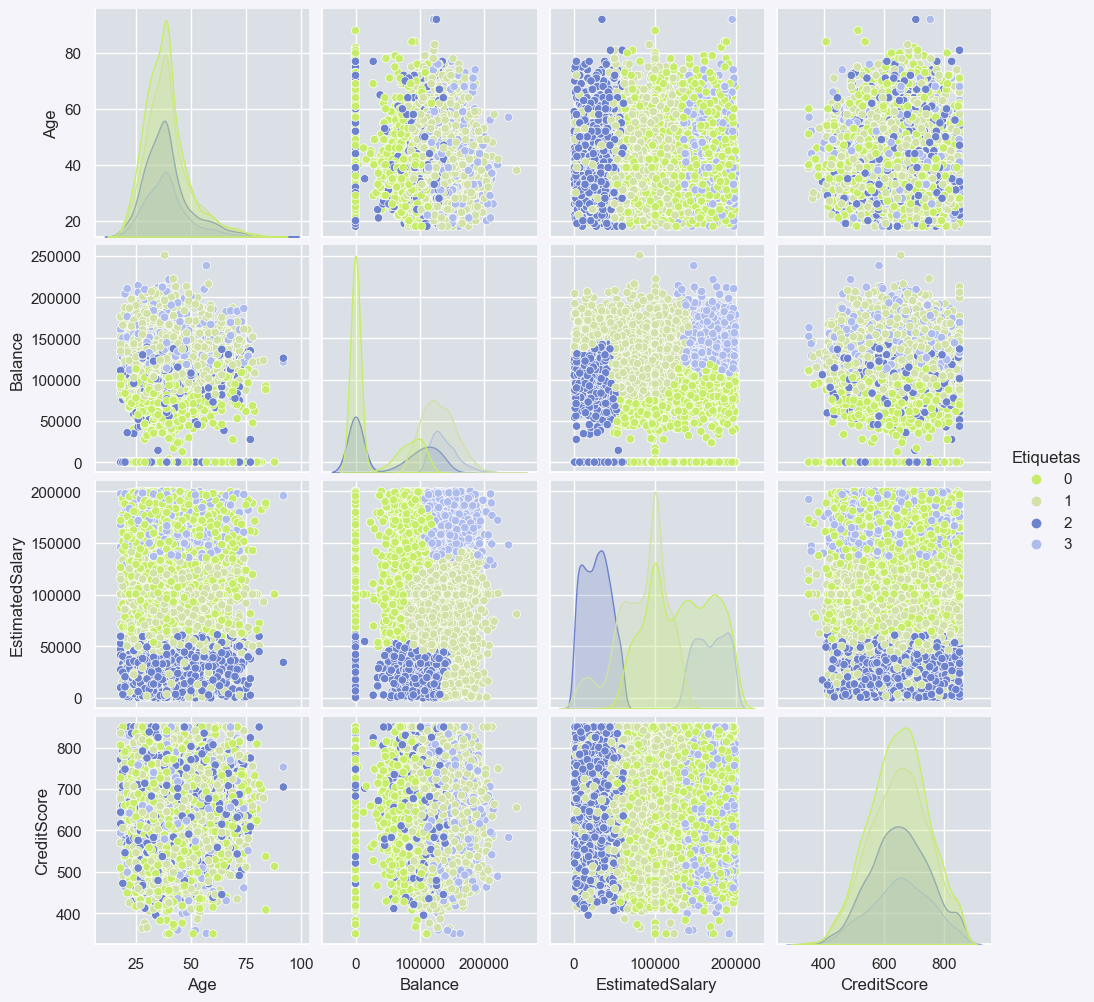

In [190]:
# Relacion entre las variables numéricas y la etiqueta

FIGCON
To_plot = [ "Age", "Balance",'EstimatedSalary','CreditScore','Etiquetas']
plt.figure(figsize=(13, 10))
sb.pairplot(BANKDF[To_plot], hue= "Etiquetas",palette= ([COLOR1,COLOR2,COLOR5,COLOR6]), height=2.55) 
plt.show()

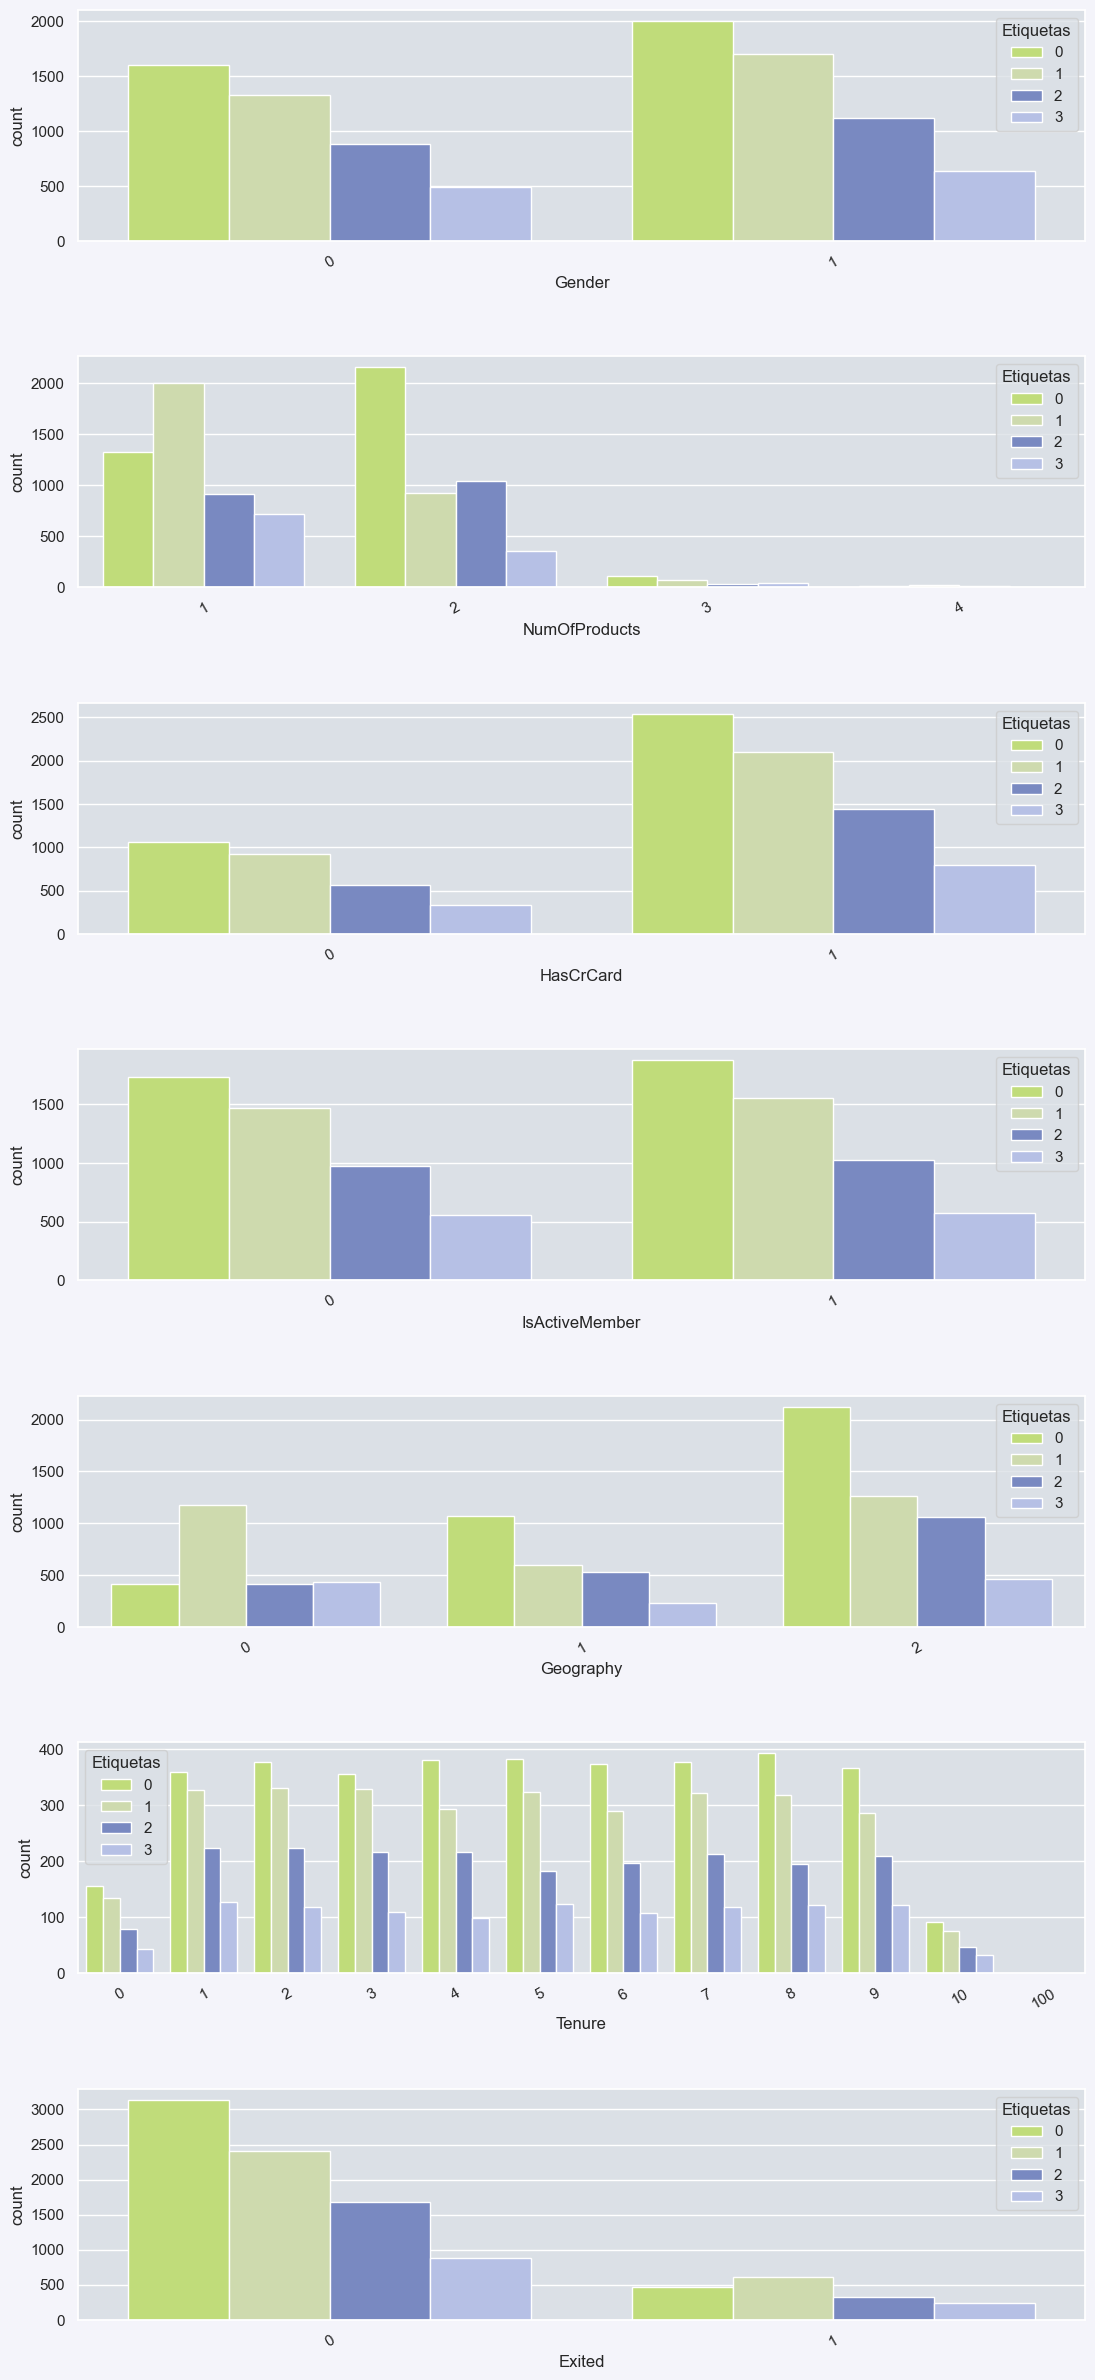

In [191]:
# Relacion entre las variables categóricas y la etiqueta

FIGCON
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(13,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_category):
  sb.countplot(x=col, data=BANKDF, ax=ax[i], palette=[COLOR1,COLOR2,COLOR5,COLOR6], hue=BANKDF['Etiquetas'])
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Por último compararemos las relaciones entre un par de variables numéricas y categóricas. En concreto:
<ul><li>-HasCrCard</li>
<li>-NumOfProducts</li>
<li>-CreditScore</li>
<li>-Balance</li>
<li>-EstimatedSalary</li></ul>

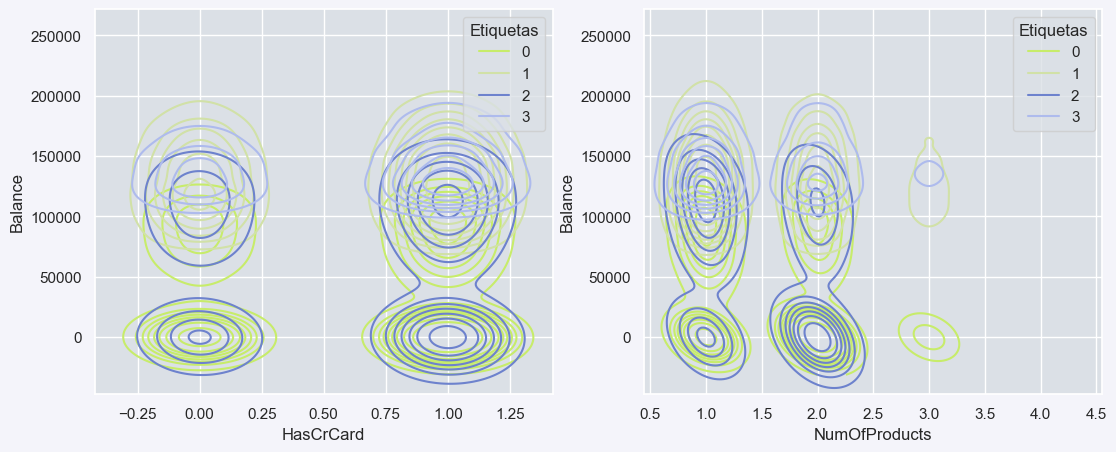

In [192]:
# Relación entre las categorias de Tarjeta de Crédito y Numero de productos contra el balance de la cuenta

categoricaldf = BANKDF[['HasCrCard','NumOfProducts']].astype(int)
fig = plt.figure(figsize=(13,5))
for num, col in enumerate(categoricaldf):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(1,2,num+1)    
    sb.kdeplot(x=categoricaldf[col], y=BANKDF['Balance'], palette=[COLOR1,COLOR2,COLOR5,COLOR6], hue=BANKDF['Etiquetas'])

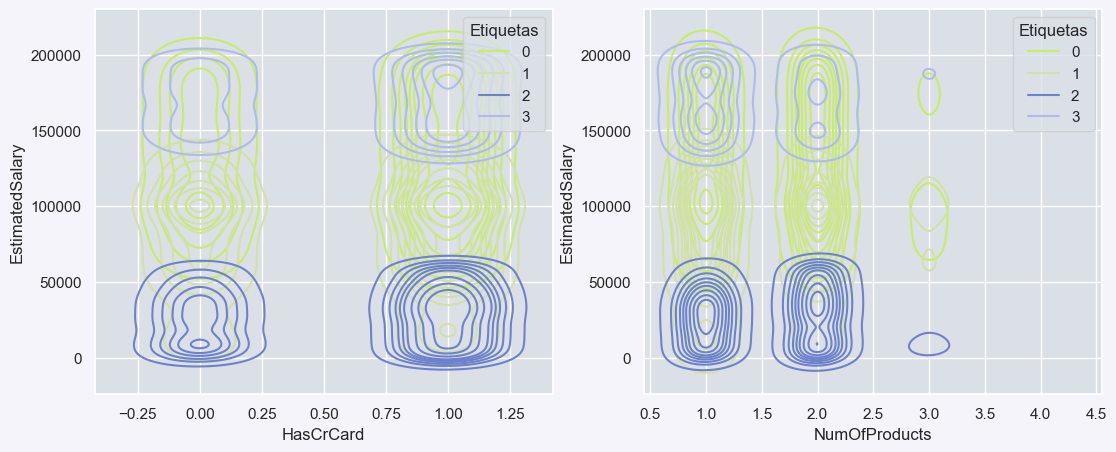

In [193]:
# Relación entre las categorias de Tarjeta de Crédito y Numero de productos contra el salario estimado

categoricaldf = BANKDF[['HasCrCard','NumOfProducts']].astype(int)
fig = plt.figure(figsize=(13,5))
for num, col in enumerate(categoricaldf):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(1,2,num+1)    
    sb.kdeplot(x=categoricaldf[col], y=BANKDF['EstimatedSalary'], palette=[COLOR1,COLOR2,COLOR5,COLOR6], hue=BANKDF['Etiquetas'])

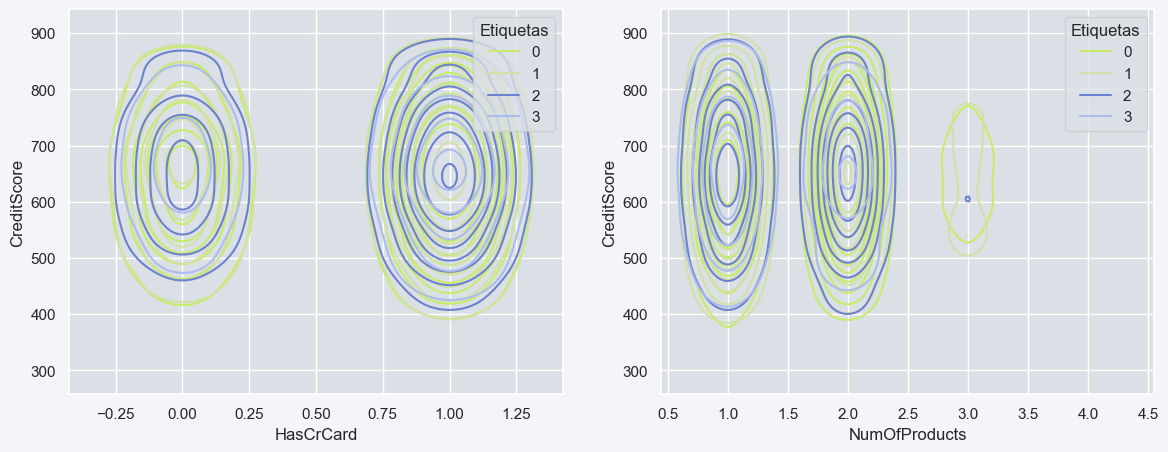

In [194]:
# Relación entre las categorias de Tarjeta de Crédito y Numero de productos contra el credit score

categoricaldf = BANKDF[['HasCrCard','NumOfProducts']].astype(int)
fig = plt.figure(figsize=(14,5))
for num, col in enumerate(categoricaldf):
    fig.subplots_adjust(hspace=.25)
    fig.add_subplot(1,2,num+1)    
    sb.kdeplot(x=categoricaldf[col], y=BANKDF['CreditScore'], palette=[COLOR1,COLOR2,COLOR5,COLOR6], hue=BANKDF['Etiquetas'])

## Análisis de resultados del segundo modelo:

Etiqueta 0:
- Es el grupo más grande
- Su balance no llega a los 150.000
- El salario mínimo supera los 50.000 mensuales
- Más de la mitad tienen tarjeta de crédito
- Son los que tienen mayor tendencia a contratar 2 productos con el banco

En conclusión: Son perfiles de clientes que no ganan mal pero no acostumbran a tener dinero en la cuenta. Tienen créditos

Etiqueta 1:
- Su balance no baja de 50.000
- El salario estimado no supera los 150.000
- Su gran mayoría solo tiene 1 producto con el banco
- Al igual que el grupo 0 más de la mitad tiene tarjeta de crédito
- Son el grupo con más clientes de Alabama
- Entre las 4 etiquetas son el grupo que más ha abandonado la entidad bancaria

En conclusión: Ganan menos que el grupo  0 pero no gastan su dinero tan rápidamente

Etiqueta 2:
- Son el grupo con la relación balance-salario más bajo
- Al igual que los grupos anteriores más del 50% tienen tarjeta de crédito

En conclusión: Son el grupo con menos dinero

Etiqueta 3:
- Son el grupo más pequeño
- Tienen la relación balance-salario más alto
- Son quienes menos contratan tarjetas de crédito

En conclusión: Son nuestros perfiles de clase alta. Si necesitaramos agrupar por este criterio, podríamos decir que el grupo 0 es el que más se les acerca

<div align="center"><img src="https://i.postimg.cc/gkPdTK13/CONCLUSION.png" alt="2-4-head" border="0"></a></div>

El agrupamiento del Kmeans nos devuelve una agrupación que parece tener como principales relaciones la edad de los clientes y el balance de su cuenta.<p> El agrupamiento jerarquico nos da un poco más de información sobre el comportamiento de los clientes respecto a la cantidad y el tipo de productos que contrata, el salario estimado y el balance en la cuenta
<p>Según sean las necesidades a satisfacer con el análisis ya procederíamos a tomar la decisión sobre cuál agrupamiento utilizar
